In [1]:
# entropy and information content
import math

def entropy(p):
    'point-entropy of occurance with probability p.'
    if p != 0:
        return - p * math.log(p, 2)
    return 0.

def info_content(p):
    'information content of event with probability p.'
    if p != 0:
        return - math.log(p, 2)
    return 0.

print(entropy(0.5), entropy(0.1), entropy(0))
print(info_content(0.5), info_content(0.1), info_content(0))

print('info of a die, rolling a 4:', info_content(1/6), ' bits')

0.5 0.33219280948873625 0.0
1.0 3.321928094887362 0.0
info of a die, rolling a 4: 2.584962500721156  bits


In [2]:
equl_distr = [x/6 for x in range(6)]
lopside_distr = [1., 0, 0, 0, 0, 0]

def tot_entropy(dist):
    return sum([entropy(x) for x in dist])

print('equal distr entropy:', tot_entropy(equl_distr))
print('lopsides distr entropy:', tot_entropy(lopside_distr))

equal distr entropy: 2.068318255702844
lopsides distr entropy: 0.0


In [ ]:
from gensim.corpora import Dictionary

texts = [['human', 'interface', 'computer', 'computer', 'computer']]
dct = Dictionary(texts)  # initialize a Dictionary
dct.add_documents([["cat", "say", "meow"], ["dog", "dog"], ['computer']])  # add more document (extend the vocabulary)
#dct.doc2bow(["dog", "computer", "non_existent_word"])

print(dct.token2id['computer'])
print(dct.cfs[dct.token2id['computer']], dct.dfs[dct.token2id['computer']])  # cfs: overall token frequencies, dfc: # of docs containing token
print(dct.cfs)
print(dct.dfs)

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os

MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)

doc_tokenized = [
   simple_preprocess(line, deacc = True, min_len=1, max_len=20) for line in open('lesmiserables.txt', encoding='utf-8')
]
dictionary = corpora.Dictionary(doc_tokenized)

#BoW_corpus = [
#   dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized
#]
#print(BoW_corpus)

In [ ]:
print(sorted(dictionary.dfs.items(), key=lambda item: item[1], reverse=True))

In [ ]:
# lenght of token vs. frequency
import matplotlib.pyplot as plt

token_frq = sorted(dictionary.dfs.items(), key=lambda item: item[1], reverse=True)
Xll = [len(dictionary[item[0]]) for item in token_frq]  # token lengths
Ylf = [item[1] for item in token_frq]  # token frequencies

fig, ax1 = plt.subplots(1, 1)
fig.suptitle("Word Frequencies over Word Lengths Les Miserables")
ax1.set(xlabel='word length', ylabel='word frequency')
fig.set_size_inches(10, 6)
ax1.scatter(Xll, Ylf, marker='.')

In [ ]:
dictionary.token2id['a']

In [ ]:
print(dictionary[27], dictionary[15], dictionary[8], dictionary[35])
print(dictionary[22655], dictionary[22656], dictionary[22654], dictionary[22653])

In [ ]:
import math
import matplotlib.pyplot as plt

diclst = sorted(dictionary.dfs.items(), key=lambda item: item[1], reverse=True)
Xreg = [math.log(x) for x in range(1, len(diclst)+1)]
Yreg = [math.log(x[1]) for x in diclst]
plt.plot(Xreg, Yreg)
plt.show()

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os

MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)

doc_tokenized_sci = [
   simple_preprocess(line, deacc=True, min_len=1, max_len=20) for line in open('bsc_corpus0.txt', encoding='utf-8')  # 9000 studies MF
]
dict_sci = corpora.Dictionary(doc_tokenized_sci)

diclst_sci = sorted(dict_sci.dfs.items(), key=lambda item: item[1], reverse=True)
Xsci = [math.log(x) for x in range(1, len(diclst_sci)+1)]
Ysci = [math.log(x[1]) for x in diclst_sci]
plt.plot(Xsci, Ysci)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

fig.suptitle("Zipf's law: Word Frequencies")
ax1.plot(Xreg, Yreg)
ax2.plot(Xsci, Ysci, 'tab:orange')
ax1.set_title('Les Miserables')
ax1.set(xlabel='log(rank order)', ylabel='log(frequency)')
ax2.set_title('9.000 studies from PubMed')
ax2.set(xlabel='log(rank order)', ylabel='log(frequency)')

fig.savefig('zipf_comp0.png', dpi=100, bbox_inches = 'tight', pad_inches=0.2)

In [ ]:
Xsci = [x for x in range(1, len(diclst_sci)+1)]
Ysci = [x[1] for x in diclst_sci]

fig, ax1 = plt.subplots(1, 1)
fig.suptitle("Word Frequency over Word Rank Scientific Texts")
ax1.set(xlabel='word rank', ylabel='word frequency')

ax1.plot(Xsci, Ysci)

In [ ]:
# lenght of token vs. frequency
import matplotlib.pyplot as plt

token_frq = sorted(dict_sci.dfs.items(), key=lambda item: item[1], reverse=True)
Xsll = [len(dict_sci[item[0]]) for item in token_frq]  # token lengths
Yslf = [item[1] for item in token_frq]  # token frequencies

fig, ax1 = plt.subplots(1, 1)
fig.suptitle("Word Frequencies over Word Lengths Scientific Texts")
ax1.set(xlabel='word length', ylabel='word frequency')
fig.set_size_inches(10, 6)
ax1.scatter(Xsll, Yslf, marker='.')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

fig.suptitle("Frequency - Length Distribution")
ax1.scatter(Xll, Ylf, marker='.')
ax2.scatter(Xsll, Yslf, marker='.')
ax1.set_title('Les Miserables')
ax1.set(xlabel='word length', ylabel='word frequency')
ax2.set_title('9.000 studies from PubMed')
ax2.set(xlabel='word length', ylabel='word frequency')

fig.savefig('lf_comp0.png', dpi=100, bbox_inches = 'tight', pad_inches=0.2)

In [ ]:
# Lotka's Law https://en.wikipedia.org/wiki/Lotka%27s_law
import math
import matplotlib.pyplot as plt

def lotka(x, n, c):
    return c / x ** n

lotka_smpl = [lotka(x, 2, 100) for x in range(1, 11)]
plt.plot(lotka_smpl)
plt.show()

print('number of authors:', lotka_smpl, sum(lotka_smpl))
print('cumulative authors:', [sum(lotka_smpl[:idx]) for idx in range(1, len(lotka_smpl)+1)])
print('articles written by author tier:', [lotka_smpl[idx] * (idx+1) for idx in range(0, len(lotka_smpl))])

print(sum([100.0, 50.0, 33.33333333333333, 25.0, 20.0, 16.666666666666664, 14.285714285714286, 12.5, 11.11111111111111, 10.0]))

print(math.sqrt(155), .5*293, sum([33.333, 25.0, 20.0, 16.64, 14.286, 12.5, 11.111, 10.0]))

print('compare to Pareto:', .8*293, .2*155, sum([11.11111, 6.25, 4.0, 2.8, 2.04123, 1.56, 1.28, 1.0]), 'writing', 143)

In [ ]:
'''Jaro distance'''
from __future__ import division
 
def jaro(s, t):
    '''Jaro distance between two strings.'''
    s_len = len(s)
    t_len = len(t)
 
    if s_len == 0 and t_len == 0:
        return 1
 
    match_distance = (max(s_len, t_len) // 2) - 1
 
    s_matches = [False] * s_len
    t_matches = [False] * t_len
 
    matches = 0
    transpositions = 0
 
    for i in range(s_len):
        start = max(0, i - match_distance)
        end = min(i + match_distance + 1, t_len)
 
        for j in range(start, end):
            if t_matches[j]:
                continue
            if s[i] != t[j]:
                continue
            s_matches[i] = True
            t_matches[j] = True
            matches += 1
            break
 
    if matches == 0:
        return 0
 
    k = 0
    for i in range(s_len):
        if not s_matches[i]:
            continue
        while not t_matches[k]:
            k += 1
        if s[i] != t[k]:
            transpositions += 1
        k += 1
 
    return ((matches / s_len) +
            (matches / t_len) +
            ((matches - transpositions / 2) / matches)) / 3
 
def main():
    '''Tests'''
 
    for s, t in [('MARTHA', 'MARHTA'),
                 ('DIXON', 'DICKSONX'),
                 ('JELLYFISH', 'SMELLYFISH'),
                ('this is a test', 'and this is another test')]:
        print("jaro(%r, %r) = %.10f" % (s, t, jaro(s, t)))
 
 
if __name__ == '__main__':
    main()

[0, 0.18181818181818182, 0.2727272727272727, 0.45454545454545453]


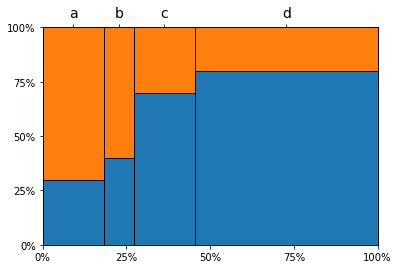

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1)
y = [.3, .4, .7, .8]
x = [100, 50, 100, 300]
x_label = ['a','b','c', 'd']
width = [i/sum(x) for i in x]
# calculate x coordinates based on the width of the previous bars
# same as: [0, width[0], width[0] + width[1], width[0] + width[1] + width[2]]
adjusted_x, temp = [0], 0
for i in width[:-1]:
    temp += i
    adjusted_x.append(temp)
    
print(adjusted_x)    

# Marimekko chart
plt.bar(adjusted_x, y, width=width, align='edge', edgecolor='black')
plt.bar(adjusted_x, np.ones(len(y))-y, bottom=y, width=width, align='edge', edgecolor='black')
# x and y ticks (%)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
plt.ylim(0,1)
plt.xlim(0,1)
# twin y-axis to draw x-ticks at the top
axy = ax.twiny()
axy.set_xticks([(width[i]/2)+ v for i, v in enumerate(adjusted_x)])
axy.set_xticklabels(x_label, fontsize=14)
plt.show()

In [6]:
# abstract summary test
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

document1 = input("Please enter text to be summarized:")

print()

# For Strings
parser = PlaintextParser.from_string(document1,Tokenizer("english"))

# Using LexRank
summarizer = LexRankSummarizer()
summary = summarizer(parser.document, 2)

for sentence in summary:
    print(sentence)

Please enter text to be summarized:Recently, the COVID-19 pandemic raised some concerns about immunosuppression in MS, leading to treatment delay or cessation. Some publications have suggested that anti-CD20 therapies in a 6-month schedule (i.e., rituximab and ocrelizumab) may be associated with an increased risk of severe COVID-19 disease and need for hospitalization [56], not confirmed by a recent study [57]. MS patients appear to respond to SARS-CoV2 in a similar way to the general population and high disability or a progressive disease course represent the most relevant risk factors for a severe COVID-19 disease in MS. Moreover, innate immune response, and, probably, anti-viral CD8 T-cell responses play a major role in eliminating the SARS-CoV2 before significant antibody responses have developed, thus B cells do not appear to be an absolute requirement for recovery. Duration of exposure might play a role, as suggested by the North American Registry, which disclosed an increased ri

In [1]:
print([3*i for i in range(21)])

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]


In [2]:
# measure average word length
import numpy as np
import os.path

# Seed random
#np.random.seed(0)

# Read data and setup maps for integer encoding and decoding.
data = open('input0.txt', 'r').read().lower()
chars = sorted(list(set(data))) # Sort makes model predictable (if seeded).
print('data size:', len(data), 'vocabulary size:', len(chars))

print('average word length:', sum([len(word) for word in data.split(' ')])/len(data.split(' ')))

data size: 18314 vocabulary size: 40
average word length: 6.574441687344913


In [5]:
def divisors(n):
    divs = [1]
    for ii in range(2, int(n ** 0.5) + 3):
        if n % ii == 0:
            divs.append(ii)
            divs.append(int(n / ii))
    divs.append(n)
    return list(set(divs))
 
 
def is_prime(n):
    return len(divisors(n)) == 2
 
 
def primes():
    ii = 1
    while True:
        ii += 1
        if is_prime(ii):
            yield ii
 
 
def prime(n):
    generator = primes()
    for ii in range(n - 1):
        generator.__next__()
    return generator.__next__()
 
 
def n_divisors(n):
    ii = 0
    while True:
        ii += 1
        if len(divisors(ii)) == n:
            yield ii
 
 
def sequence(max_n=None):
    if max_n is not None:
        for ii in range(1, max_n + 1):
            if is_prime(ii):
                yield prime(ii) ** (ii - 1)
            else:
                generator = n_divisors(ii)
                for jj, out in zip(range(ii - 1), generator):
                    pass
                yield generator.__next__()
    else:
        ii = 1
        while True:
            ii += 1
            if is_prime(ii):
                yield prime(ii) ** (ii - 1)
            else:
                generator = n_divisors(ii)
                for jj, out in zip(range(ii - 1), generator):
                    pass
                yield generator.__next__()
 
 
if __name__ == '__main__':
    for item in sequence(15):
        print(item)

1
3
25
14
14641
44
24137569
70
1089
405
819628286980801
160
22563490300366186081
2752
9801


In [4]:
# supposed to print strings like so

name = 'Izzy'
print(f"this {name}")

this Izzy


In [5]:
# merge dict

x = {'a': 1, 'b': 2}
y = {'b': 3, 'c': 4}
z = {**x, **y}

print(z)

{'a': 1, 'b': 3, 'c': 4}


In [1]:
import time

print(time.perf_counter_ns())
for i in range(1000):
    x = i
print(time.perf_counter_ns())

1112975674400
1112975858900


In [1]:
# Frequentist vs Bayesian
import random

def biased_coin(h):
    '''biased coin toss, h=prob. of head = 1'''
    return random.choice([1] * int(h*100) + [0] * int((1-h)*100))

total_heads = 0
p_biased_h = 1
for i in range(10):
    total_heads += biased_coin(0.2)
    p_h_biased = total_heads / (i+1)
    p_biased_h *= p_h_biased
    print(total_heads, p_h_biased, p_biased_h)

1 1.0 1.0
1 0.5 0.5
1 0.3333333333333333 0.16666666666666666
1 0.25 0.041666666666666664
1 0.2 0.008333333333333333
2 0.3333333333333333 0.0027777777777777775
2 0.2857142857142857 0.0007936507936507935
2 0.25 0.00019841269841269839
3 0.3333333333333333 6.613756613756613e-05
3 0.3 1.9841269841269838e-05


In [1]:
# power set
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

list(powerset(powerset("ab")))

[(),
 ((),),
 (('a',),),
 (('b',),),
 (('a', 'b'),),
 ((), ('a',)),
 ((), ('b',)),
 ((), ('a', 'b')),
 (('a',), ('b',)),
 (('a',), ('a', 'b')),
 (('b',), ('a', 'b')),
 ((), ('a',), ('b',)),
 ((), ('a',), ('a', 'b')),
 ((), ('b',), ('a', 'b')),
 (('a',), ('b',), ('a', 'b')),
 ((), ('a',), ('b',), ('a', 'b'))]

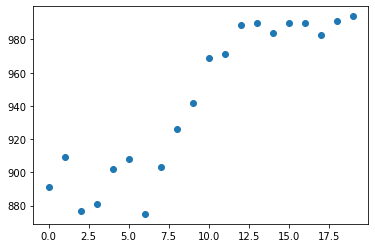

In [19]:
# customer conversion
import numpy as np
from matplotlib import pyplot as plt

def conv_prob(n, p0=0.794, p1=6., p2=0.011):
    return p0 / (1. + np.exp(-(p1-n))) + p2

ncust = 1000
ninteract = 20

cust = np.ones(ncust)
conv = np.zeros(ncust)
nconv = np.zeros(ninteract)

for nc in range(ninteract):
    for i in range(ncust):
        if np.random.random() > conv_prob(nc, p0=0.1, p1=9., p2=0.01):
            conv[i] = 1
        else:
            conv[i] = 0
    nconv[nc] = np.sum(conv)
    
plt.plot(nconv, 'o')
plt.show()

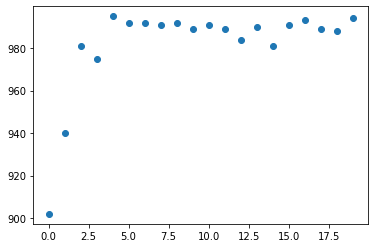

In [1]:
# customer conversion with network effect
import numpy as np
from matplotlib import pyplot as plt

def conv_prob(n, p0=0.794, p1=6., p2=0.011):
    return p0 / (1. + np.exp(-(p1-n))) + p2

ncust = 1000
ninteract = 20

cust = np.ones(ncust)
conv = np.zeros(ncust)
nconv = np.zeros(ninteract)

for nc in range(ninteract):
    for i in range(ncust):
        if np.random.random() > conv_prob(nc, p0=0.1, p1=(ncust - np.sum(conv))/ncust * 9., p2=0.01):
            conv[i] = 1
        else:
            conv[i] = 0
    nconv[nc] = np.sum(conv)
    
plt.plot(nconv, 'o')
plt.show()

In [2]:
from numpy import random

x = random.poisson(lam=2, size=10)

print(x)

[1 3 2 1 2 1 4 4 2 1]


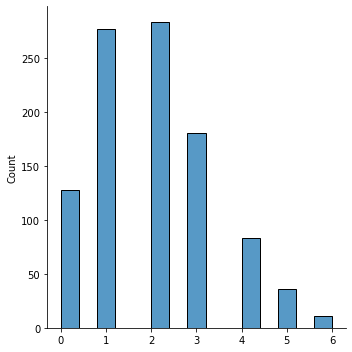

In [4]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(random.poisson(lam=2, size=1000), kde=False)

plt.show()

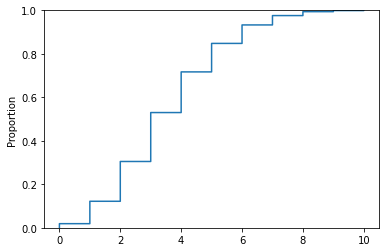

In [15]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.ecdfplot(random.poisson(lam=1.2*3, size=1000))

plt.show()

In [ ]:
from manim_imports_ext import *
from tqdm import tqdm as ProgressDisplay
from scipy.stats import entropy


MISS = 0
MISPLACED = 1
EXACT = 2

DATA_DIR = os.path.join(get_directories()["data"], "wordle")
WORD_DATA_DIR = os.path.join(
    os.path.dirname(os.path.realpath(__file__)),
    "wordle_data",
)
SHORT_WORD_LIST_FILE = os.path.join(WORD_DATA_DIR, "possible_words.txt")
LONG_WORD_LIST_FILE = os.path.join(WORD_DATA_DIR, "allowed_words.txt")
WORD_FREQ_FILE = os.path.join(WORD_DATA_DIR, "wordle_words_freqs_full.txt")
WORD_FREQ_MAP_FILE = os.path.join(WORD_DATA_DIR, "freq_map.json")
SECOND_GUESS_MAP_FILE = os.path.join(WORD_DATA_DIR, "second_guess_map.json")
PATTERN_MATRIX_FILE = os.path.join(DATA_DIR, "pattern_matrix.npy")
ENT_SCORE_PAIRS_FILE = os.path.join(DATA_DIR, "ent_score_pairs.json")

# To store the large grid of patterns at run time
PATTERN_GRID_DATA = dict()


def safe_log2(x):
    return math.log2(x) if x > 0 else 0


# Reading from files

def get_word_list(short=False):
    result = []
    file = SHORT_WORD_LIST_FILE if short else LONG_WORD_LIST_FILE
    with open(file) as fp:
        result.extend([word.strip() for word in fp.readlines()])
    return result


def get_word_frequencies(regenerate=False):
    if os.path.exists(WORD_FREQ_MAP_FILE) or regenerate:
        with open(WORD_FREQ_MAP_FILE) as fp:
            result = json.load(fp)
        return result
    # Otherwise, regenerate
    freq_map = dict()
    with open(WORD_FREQ_FILE) as fp:
        for line in fp.readlines():
            pieces = line.split(' ')
            word = pieces[0]
            freqs = [
                float(piece.strip())
                for piece in pieces[1:]
            ]
            freq_map[word] = np.mean(freqs[-5:])
    with open(WORD_FREQ_MAP_FILE, 'w') as fp:
        json.dump(freq_map, fp)
    return freq_map


def get_frequency_based_priors(n_common=3000, width_under_sigmoid=10):
    """
    We know that that list of wordle answers was curated by some human
    based on whether they're sufficiently common. This function aims
    to associate each word with the likelihood that it would actually
    be selected for the final answer.

    Sort the words by frequency, then apply a sigmoid along it.
    """
    freq_map = get_word_frequencies()
    words = np.array(list(freq_map.keys()))
    freqs = np.array([freq_map[w] for w in words])
    arg_sort = freqs.argsort()
    sorted_words = words[arg_sort]

    # We want to imagine taking this sorted list, and putting it on a number
    # line so that it's length is 10, situating it so that the n_common most common
    # words are positive, then applying a sigmoid
    x_width = width_under_sigmoid
    c = x_width * (-0.5 + n_common / len(words))
    xs = np.linspace(c - x_width / 2, c + x_width / 2, len(words))
    priors = dict()
    for word, x in zip(sorted_words, xs):
        priors[word] = sigmoid(x)
    return priors


def get_true_wordle_prior():
    words = get_word_list()
    short_words = get_word_list(short=True)
    return dict(
        (w, int(w in short_words))
        for w in words
    )


# String matching, etc.


def words_to_int_arrays(words):
    base = ord('a')
    arr = np.array([[ord(c) - base for c in w] for w in words], dtype=np.uint8)

    # To appropriately handle double letter situations, we want to treat
    # the first occurance of a letter as distinct form its second occurance,
    # so assign it a distinct number.
    for i in range(1, arr.shape[1]):
        for j in range(i):
            arr[:, i] += (arr[:, i] == arr[:, j]) * np.uint8(26)
    return arr


def pattern_trit_generator(guess, answer):
    guess_arr, answer_arr = words_to_int_arrays([guess, answer])
    for c1, c2 in zip(guess_arr, answer_arr):
        if c1 % 26 == c2 % 26:
            yield EXACT
        elif (c1 == answer_arr).any():
            yield MISPLACED
        else:
            yield MISS


def get_pattern(guess, answer):
    """
    A unique integer id associated with the grey/yellow/green wordle
    pattern relatign a guess to the tue answer. In the ternary representation
    of this number, 0 -> grey, 1 -> yellow, 2 -> green.
    """
    return sum(
        value * (3**i)
        for i, value in enumerate(pattern_trit_generator(guess, answer))
    )


def pattern_from_string(pattern_string):
    return sum((3**i) * int(c) for i, c in enumerate(pattern_string))


def pattern_to_int_list(pattern):
    result = []
    curr = pattern
    for x in range(5):
        result.append(curr % 3)
        curr = curr // 3
    return result


def pattern_to_string(pattern):
    d = {MISS: "⬛", MISPLACED: "🟨", EXACT: "🟩"}
    return "".join(d[x] for x in pattern_to_int_list(pattern))


def patterns_to_string(patterns):
    return "\n".join(map(pattern_to_string, patterns))


def patterns_hash(patterns):
    """
    Unique id for a list of patterns
    """
    return hash("".join(map(str, patterns)))
    # return sum((3**(5 * i) + 1) * (p + 1) for i, p in enumerate(patterns))


def generate_pattern_matrix(words):
    """
    A pattern for two words represents the worle-similarity
    pattern (grey -> 0, yellow -> 1, green -> 2) but as an integer
    between 0 and 3^5. Reading this integer in ternary gives the
    associated pattern.

    This function computes the pairwise patterns between two lists
    of words, returning the result as a grid of hash values. Since
    this can be time-consuming, all operations that can be are vectorized
    (perhaps at the expense of easier readibility), and the the result
    is typically saved to file as per generate_full_pattern_matrix below.
    """
    # Convert word lists to integer arrays
    n = len(words[0])
    w1, w2 = map(words_to_int_arrays, (words, words))

    if len(w1) == 0:
        return np.zeros((len(w1), len(w2)), dtype=np.uint8)

    # equality_grid[a, b, i, j] represents whether the ith letter
    # of words1[a] equals the jth letter of words2[b]
    equality_grid = np.zeros((len(w1), len(w2), n, n), dtype=bool)
    mod_equality_grid = np.zeros((len(w1), len(w2), n, n), dtype=bool)
    for i, j in it.product(range(n), range(n)):
        equality_grid[:, :, i, j] = np.equal.outer(w1[:, i], w2[:, j])
        mod_equality_grid[:, :, i, j] = np.equal.outer(w1[:, i] % 26, w2[:, j] % 26)

    pattern_matrix = np.zeros((len(w1), len(w2)), dtype=np.uint8)
    three_pows = (3**np.arange(n)).astype(np.uint8)
    for i, tp in enumerate(three_pows):
        pattern_matrix[:, :] += tp * np.maximum(
            # This accounts for yellow squares
            equality_grid[:, :, i, :].any(2),
            # This accounts for green squares
            np.uint8(2) * mod_equality_grid[:, :, i, i]
        )

    # Save to file
    np.save(PATTERN_MATRIX_FILE, pattern_matrix)

    return pattern_matrix


def get_pattern_matrix(words1, words2):
    if not PATTERN_GRID_DATA:
        if not os.path.exists(PATTERN_MATRIX_FILE):
            log.info("Generating pattern matrix. This takes a moment, but is only needed once")
            generate_pattern_matrix(get_word_list())
        PATTERN_GRID_DATA['grid'] = np.load(PATTERN_MATRIX_FILE)
        PATTERN_GRID_DATA['words_to_index'] = dict(zip(
            get_word_list(), it.count()
        ))

    full_grid = PATTERN_GRID_DATA['grid']
    words_to_index = PATTERN_GRID_DATA['words_to_index']

    indices1 = [words_to_index[w] for w in words1]
    indices2 = [words_to_index[w] for w in words2]
    return full_grid[np.ix_(indices1, indices2)]


def get_possible_words(guess, pattern, word_list):
    all_hashes = get_pattern_matrix([guess], word_list).flatten()
    return list(np.array(word_list)[all_hashes == pattern])


def get_word_buckets(guess, possible_words):
    buckets = [[] for x in range(3**5)]
    hashes = get_pattern_matrix([guess], possible_words).flatten()
    for index, word in zip(hashes, possible_words):
        buckets[index].append(word)
    return buckets


# Functions associated with entropy calculation


def get_weights(words, priors):
    frequencies = np.array([priors[word] for word in words])
    total = frequencies.sum()
    if total == 0:
        return np.zeros(frequencies.shape)
    return frequencies / total


def get_pattern_distributions(allowed_words, possible_words, weights):
    """
    For each possible guess in allowed_words, this finds the probability
    distribution across all of the 3^5 wordle patterns you could see, assuming
    the possible answers are in possible_words with associated probabilities
    in weights.

    It considers the pattern hash grid between the two lists of words, and uses
    that to bucket together words from possible_words which would produce
    the same pattern, adding together their corresponding probabilities.
    """
    pattern_matrix = get_pattern_matrix(allowed_words, possible_words)

    n = len(allowed_words)
    distributions = np.zeros((n, 3**5))
    n_range = np.arange(n)
    for j, prob in enumerate(weights):
        distributions[n_range, pattern_matrix[:, j]] += prob
    return distributions


def entropy_of_distributions(distributions, atol=1e-12):
    axis = len(distributions.shape) - 1
    return entropy(distributions, base=2, axis=axis)


def get_entropies(allowed_words, possible_words, weights):
    if weights.sum() == 0:
        return np.zeros(len(allowed_words))
    distributions = get_pattern_distributions(allowed_words, possible_words, weights)
    return entropy_of_distributions(distributions)


def max_bucket_size(guess, possible_words, weights):
    dist = get_pattern_distributions([guess], possible_words, weights)
    return dist.max()


def words_to_max_buckets(possible_words, weights):
    return dict(
        (word, max_bucket_size(word, possible_words, weights))
        for word in ProgressDisplay(possible_words)
    )

    words_and_maxes = list(w2m.items())
    words_and_maxes.sort(key=lambda t: t[1])
    words_and_maxes[:-20:-1]


# Functions to analyze second guesses


def get_average_second_step_entropies(first_guesses, allowed_second_guesses, possible_words, priors):
    result = []
    weights = get_weights(possible_words, priors)
    if weights.sum() == 0:
        return np.zeros(len(first_guesses))

    distributions = get_pattern_distributions(first_guesses, possible_words, weights)
    for first_guess, dist in ProgressDisplay(list(zip(first_guesses, distributions)), leave=False, desc="Searching 2nd step entropies"):
        word_buckets = get_word_buckets(first_guess, possible_words)
        # List of maximum entropies you could achieve in
        # the second step for each pattern you might see
        # after this setp
        ents2 = np.array([
            get_entropies(
                allowed_words=allowed_second_guesses,
                possible_words=bucket,
                weights=get_weights(bucket, priors)
            ).max()
            for bucket in word_buckets
        ])
        # Multiply each such maximal entropy by the corresponding
        # probability of falling into that bucket
        result.append(np.dot(ents2, dist))
    return np.array(result)


def build_best_second_guess_map(guess, allowed_words, possible_words, priors, **kwargs):
    word_buckets = get_word_buckets(guess, possible_words)
    msg = f"Building second guess map for \"{guess}\""
    return [
        optimal_guess(allowed_words, bucket, priors, **kwargs)
        for bucket in ProgressDisplay(word_buckets, desc=msg, leave=False)
    ]


def get_second_guess_map(guess, regenerate=False, save_to_file=True, **kwargs):
    with open(SECOND_GUESS_MAP_FILE) as fp:
        saved_maps = json.load(fp)

    if guess not in saved_maps or regenerate:
        words = get_word_list()
        priors = get_frequency_based_priors()

        sg_map = build_best_second_guess_map(guess, words, words, priors, **kwargs)
        saved_maps[guess] = sg_map

        if save_to_file:
            with open(SECOND_GUESS_MAP_FILE, 'w') as fp:
                json.dump(saved_maps, fp)

    return saved_maps[guess]


# Solvers

def get_guess_values_array(allowed_words, possible_words, priors, look_two_ahead=False):
    weights = get_weights(possible_words, priors)
    ents1 = get_entropies(allowed_words, possible_words, weights)
    probs = np.array([
        0 if word not in possible_words else weights[possible_words.index(word)]
        for word in allowed_words
    ])

    if look_two_ahead:
        # Look two steps out, but restricted to where second guess is
        # amoung the remaining possible words
        ents2 = np.zeros(ents1.shape)
        top_indices = np.argsort(ents1)[-250:]
        ents2[top_indices] = get_average_second_step_entropies(
            first_guesses=np.array(allowed_words)[top_indices],
            allowed_second_guesses=allowed_words,
            possible_words=possible_words,
            priors=priors
        )
        return np.array([ents1, ents2, probs])
    else:
        return np.array([ents1, probs])


def entropy_to_expected_score(ent):
    """
    Based on a regression associating entropies with typical scores
    from that point forward in simulated games, this function returns
    what the expected number of guesses required will be in a game where
    there's a given amount of entropy in the remaining possibilities.
    """
    if not isinstance(ent, np.ndarray):
        ent = np.array(ent)
    log_part = np.log(ent + 1, out=np.zeros(ent.size), where=(ent > 0))
    return 1 + 0.56 * log_part + 0.1 * ent


def get_expected_scores(allowed_words, possible_words, priors,
                        look_two_ahead=False,
                        n_top_candidates_for_two_step=25,
                        ):
    # Currenty entropy of distribution
    weights = get_weights(possible_words, priors)
    H0 = entropy_of_distributions(weights)
    H1s = get_entropies(allowed_words, possible_words, weights)

    word_to_weight = dict(zip(possible_words, weights))
    probs = np.array([word_to_weight.get(w, 0) for w in allowed_words])
    # If this guess is the true answer, score is 1. Otherwise, it's 1 plus
    # the expected number of guesses it will take after getting the corresponding
    # amount of information.
    expected_scores = probs + (1 - probs) * (1 + entropy_to_expected_score(H0 - H1s))

    if not look_two_ahead:
        return expected_scores

    # For the top candidates, refine the score by looking two steps out
    # This is currently quite slow, and could be optimized to be faster.
    # But why?
    sorted_indices = np.argsort(expected_scores)
    allowed_second_guesses = get_word_list()
    expected_scores += 1  # Push up the rest
    for i in ProgressDisplay(sorted_indices[:n_top_candidates_for_two_step], leave=False):
        guess = allowed_words[i]
        H1 = H1s[i]
        dist = get_pattern_distributions([guess], possible_words, weights)[0]
        buckets = get_word_buckets(guess, possible_words)
        second_guesses = [
            optimal_guess(allowed_second_guesses, bucket, priors, look_two_ahead=False)
            for bucket in buckets
        ]
        H2s = [
            get_entropies([guess2], bucket, get_weights(bucket, priors))[0]
            for guess2, bucket in zip(second_guesses, buckets)
        ]

        prob = word_to_weight.get(guess, 0)
        expected_scores[i] = sum((
            # 1 times Probability guess1 is correct
            1 * prob,
            # 2 times probability guess2 is correct
            2 * (1 - prob) * sum(
                p * word_to_weight.get(g2, 0)
                for p, g2 in zip(dist, second_guesses)
            ),
            # 2 plus expected score two steps from now
            (1 - prob) * (2 + sum(
                p * (1 - word_to_weight.get(g2, 0)) * entropy_to_expected_score(H0 - H1 - H2)
                for p, g2, H2 in zip(dist, second_guesses, H2s)
            ))
        ))
    return expected_scores


def optimal_guess(allowed_words, possible_words, priors, look_two_ahead=False, purely_maximize_information=False):
    if purely_maximize_information:
        if len(possible_words) == 1:
            return possible_words[0]
        weights = get_weights(possible_words, priors)
        ents = get_entropies(allowed_words, possible_words, weights)
        return allowed_words[np.argmax(ents)]
    # Otherwise, minimize expected score
    expected_scores = get_expected_scores(
        allowed_words, possible_words, priors,
        look_two_ahead=look_two_ahead
    )
    return allowed_words[np.argmin(expected_scores)]


# Scene types


class WordleScene(Scene):
    n_letters = 5
    grid_height = 6
    font_to_grid_height_ratio = 10
    grid_center = ORIGIN
    secret_word = None
    color_map = {
        0: "#797C7E",  # GREY
        1: "#C6B566",  # YELLOW
        2: GREEN_D,  # GREEN
    }
    uniform_prior = False
    wordle_based_prior = False
    freq_prior = True
    reveal_run_time = 2
    reveal_lag_ratio = 0.5

    CONFIG = {"random_seed": None}

    def setup(self):
        self.all_words = self.get_word_list()
        self.priors = self.get_priors()
        if self.secret_word is None:
            s_words = get_word_list(short=True)
            self.secret_word = random.choice(s_words)
        self.guesses = []
        self.patterns = []
        self.possibilities = self.get_initial_possibilities()

        self.add_grid()

    def get_word_list(self):
        return get_word_list()

    def get_initial_possibilities(self):
        return get_word_list()

    def get_priors(self):
        words = self.all_words
        if self.uniform_prior:
            return dict((w, 1) for w in words)
        elif self.wordle_based_prior:
            return get_true_wordle_prior()
        else:
            return get_frequency_based_priors()

    def get_pattern(self, guess):
        return get_pattern(guess, self.secret_word)

    def get_current_entropy(self):
        weights = get_weights(self.possibilities, self.priors)
        return entropy_of_distributions(weights)

    ##

    def add_grid(self):
        buff = 0.1
        row = Square(side_length=1).get_grid(1, self.n_letters, buff=buff)
        grid = row.get_grid(6, 1, buff=buff)
        grid.set_height(self.grid_height)
        grid.move_to(self.grid_center)
        grid.set_stroke(WHITE, 2)
        grid.words = VGroup()
        grid.pending_word = VGroup()
        grid.add(grid.words, grid.pending_word)
        grid.pending_pattern = None
        grid.add_updater(lambda m: m)
        self.grid = grid
        self.add(grid)

    def get_curr_row(self):
        return self.grid[len(self.grid.words)]

    def get_curr_square(self):
        row = self.get_curr_row()
        return row[len(self.grid.pending_word)]

    def add_letter(self, letter):
        grid = self.grid
        if len(grid.pending_word) == len(grid[0]):
            return

        font_size = self.font_to_grid_height_ratio * self.grid_height
        letter_mob = Text(letter.upper(), font="Consolas", font_size=font_size)
        letter_mob.move_to(self.get_curr_square())

        grid.pending_word.add(letter_mob)

    def delete_letter(self):
        if len(self.grid.pending_word) == 0:
            return
        letter_mob = self.grid.pending_word[-1]
        self.grid.pending_word.remove(letter_mob)

    def add_word(self, word, wait_time_per_letter=0.1):
        for letter in word:
            self.add_letter(letter)
            self.wait(
                wait_time_per_letter,
                ignore_presenter_mode=True
            )

    def pending_word_as_string(self):
        return "".join(
            t.text.lower()
            for t in self.grid.pending_word
        )

    def is_valid_guess(self):
        guess = self.pending_word_as_string()
        return guess in self.all_words

    def reveal_pattern(self, pattern=None, animate=True):
        grid = self.grid
        guess = self.pending_word_as_string()

        if not self.is_valid_guess():
            self.shake_word_out()
            return False

        if pattern is None:
            pattern = self.get_pattern(guess)
            if pattern is None:
                return False

        self.show_pattern(pattern, animate=animate)

        self.guesses.append(guess)
        self.patterns.append(pattern)
        grid.words.add(grid.pending_word.copy())
        grid.pending_word.set_submobjects([])
        grid.pending_pattern = None
        self.refresh_possibilities(guess, pattern)

        # Win condition
        if self.has_won():
            self.win_animation()

        return True

    def refresh_possibilities(self, guess, pattern):
        self.possibilities = get_possible_words(
            guess, pattern, self.possibilities
        )

    def shake_word_out(self):
        row = self.get_curr_row()
        c = row.get_center().copy()
        func = bezier([0, 0, 1, 1, -1, -1, 0, 0])
        self.play(UpdateFromAlphaFunc(
            VGroup(row, self.grid.pending_word),
            lambda m, a: m.move_to(c + func(a) * RIGHT),
            run_time=0.5,
        ))
        self.grid.pending_word.set_submobjects([])

    def show_pattern(self, pattern, animate=False, added_anims=[]):
        row = self.get_curr_row()
        colors = self.get_colors(pattern)
        if animate:
            self.animate_color_change(row, self.grid.pending_word, colors, added_anims)
        else:
            self.set_row_colors(row, colors)

        self.grid.pending_pattern = pattern

    def set_row_colors(self, row, colors):
        for square, color in zip(row, colors):
            square.set_fill(color, 1)

    def animate_color_change(self, row, word, colors, added_anims=[]):
        colors.extend((len(row) - len(colors)) * [self.color_map[0]])
        for square, color in zip(row, colors):
            square.future_color = color

        def alpha_func(mob, alpha):
            if not hasattr(mob, 'initial_height'):
                mob.initial_height = mob.get_height()
            mob.set_height(
                mob.initial_height * max(abs(interpolate(1, -1, alpha)), 1e-6),
                stretch=True
            )
            if isinstance(mob, Square) and alpha > 0.5:
                mob.set_fill(mob.future_color, 1)

        self.play(
            *(
                LaggedStart(
                    *(
                        UpdateFromAlphaFunc(sm, alpha_func)
                        for sm in mob
                    ),
                    lag_ratio=self.reveal_lag_ratio,
                    run_time=self.reveal_run_time,
                )
                for mob in (row, word)
            ),
            *added_anims
        )
        self.remove(row, word)
        self.add(self.grid)

    def get_colors(self, pattern):
        return [self.color_map[key] for key in pattern_to_int_list(pattern)]

    def win_animation(self):
        grid = self.grid
        row = grid[len(grid.words) - 1]
        letters = grid.words[-1]
        mover = VGroup(*(
            VGroup(square, letter)
            for square, letter in zip(row, letters)
        ))
        y = row.get_y()
        bf = bezier([0, 0, 1, 1, -1, -1, 0, 0])

        self.play(
            LaggedStart(*(
                UpdateFromAlphaFunc(sm, lambda m, a: m.set_y(y + 0.2 * bf(a)))
                for sm in mover
            ), lag_ratio=0.1, run_time=1.5),
            LaggedStart(*(
                Flash(letter, line_length=0.1, flash_radius=0.4)
                for letter in letters
            ), lag_ratio=0.3, run_time=1.5),
        )

    def has_won(self):
        return len(self.patterns) > 0 and self.patterns[-1] == 3**5 - 1

    @staticmethod
    def get_grid_of_words(all_words, n_rows, n_cols, dots_index=-5, sort_key=None, font_size=24):
        if sort_key:
            all_words = list(sorted(all_words, key=sort_key))
        subset = all_words[:n_rows * n_cols]
        show_ellipsis = len(subset) < len(all_words)

        if show_ellipsis:
            subset[dots_index] = "..." if n_cols == 1 else "....."
            subset[dots_index + 1:] = all_words[dots_index + 1:]

        full_string = ""
        for i, word in zip(it.count(1), subset):
            full_string += str(word)
            if i % n_cols == 0:
                full_string += " \n"
            else:
                full_string += "  "

        full_text_mob = Text(full_string, font="Consolas", font_size=font_size)

        result = VGroup()
        for word in subset:
            part = full_text_mob.get_part_by_text(word)
            part.text = word
            result.add(part)

        if show_ellipsis and n_cols == 1:
            result[dots_index].rotate(PI / 2)
            result[dots_index].next_to(result[dots_index - 1], DOWN, SMALL_BUFF)
            result[dots_index + 1:].next_to(result[dots_index], DOWN, SMALL_BUFF)
        result.set_color(GREY_A)
        result.words = subset

        return result

    @staticmethod
    def patterns_to_squares(patterns, color_map=None):
        if color_map is None:
            color_map = WordleScene.color_map
        row = Square().get_grid(1, 5, buff=SMALL_BUFF)
        rows = row.get_grid(len(patterns), 1, buff=SMALL_BUFF)
        rows.set_stroke(WHITE, 1)
        for pattern, row in zip(patterns, rows):
            for square, key in zip(row, pattern_to_int_list(pattern)):
                square.set_fill(color_map[key], 1)
        return rows

    # Interactive parts
    def on_key_press(self, symbol, modifiers):
        try:
            char = chr(symbol)
        except OverflowError:
            log.warning("The value of the pressed key is too large.")
            return

        is_letter = (ord('a') <= ord(char) <= ord('z'))

        if is_letter:
            self.add_letter(char)
        elif symbol == 65288:  # Delete
            self.delete_letter()
        elif symbol == 65293:  # Enter
            self.reveal_pattern()

        if char == 'q' and modifiers == 1:
            self.delete_letter()
            self.quit_interaction = True

        if not is_letter:
            super().on_key_press(symbol, modifiers)


class WordleSceneWithAnalysis(WordleScene):
    grid_center = [-1.75, 1, 0]
    grid_height = 4.5
    look_two_ahead = False
    show_prior = True
    n_top_picks = 13
    entropy_color = TEAL_C
    prior_color = BLUE_C
    weight_to_prob = 3.0
    pre_computed_first_guesses = []

    def setup(self):
        self.wait_to_proceed = True
        super().setup()
        self.show_possible_words()
        self.add_count_title()
        self.add_guess_value_grid_title()
        self.init_guess_value_grid()
        self.info_labels = VGroup()
        self.add(self.info_labels)

    def construct(self):
        self.show_guess_values()

    def add_guess_value_grid_title(self):
        titles = VGroup(
            Text("Top picks"),
            Text("E[Info.]", color=self.entropy_color),
        )
        if self.look_two_ahead:
            titles.add(TexText("E[Info$_2$]", color=self.entropy_color)[0])
        if self.show_prior:
            titles.add(Tex("p(\\text{word})", color=self.prior_color))

        titles.scale(0.7)
        titles.arrange(RIGHT, buff=MED_LARGE_BUFF)
        titles.set_max_width(5)
        low_y = titles[0][0].get_bottom()[1]

        for title in titles:
            first = title.family_members_with_points()[0]
            title.shift((low_y - first.get_bottom()[1]) * UP)
            underline = Underline(title)
            underline.match_y(first.get_bottom() + 0.025 * DOWN)
            underline.set_stroke(WHITE, 2)
            underline.scale(1.1)
            title.add_to_back(underline)
            title.set_backstroke()
            underline.set_stroke(GREY_C, 2)

        titles.to_edge(UP, buff=MED_SMALL_BUFF)
        titles.to_edge(RIGHT, buff=MED_SMALL_BUFF)

        self.add(titles)
        self.guess_value_grid_titles = titles

    def add_count_title(self):
        title = VGroup(
            Text("# Possibilities"),
            Text("/"),
            Text("Uncertainty", color=self.entropy_color),
        )
        title.arrange(RIGHT, buff=SMALL_BUFF)
        title.match_width(self.count_label).scale(1.1)
        title.next_to(self.count_label, UP, buff=MED_LARGE_BUFF)
        self.count_title = title
        self.add(title)

    def init_guess_value_grid(self):
        titles = self.guess_value_grid_titles
        line = Line().match_width(titles)
        line.set_stroke(GREY_C, 1)
        lines = line.get_grid(self.n_top_picks, 1, buff=0.5)
        lines.next_to(titles, DOWN, buff=0.75)

        self.guess_value_grid_lines = lines
        self.guess_value_grid = VGroup()

    def get_count_label(self):
        score = len(self.grid.words)
        label = VGroup(
            Integer(len(self.possibilities), edge_to_fix=UR),
            Text("Pos,"),
            DecimalNumber(self.get_current_entropy(), edge_to_fix=UR, color=self.entropy_color),
            Text("Bits", color=self.entropy_color),
        )
        label.arrange(
            RIGHT,
            buff=MED_SMALL_BUFF,
            aligned_edge=UP,
        )
        label.scale(0.6)
        label.next_to(self.grid[score], LEFT)
        return label

    def reveal_pattern(self, pattern=None, animate=True):
        is_valid_guess = self.is_valid_guess()
        if is_valid_guess:
            self.isolate_guessed_row()

        did_fill = super().reveal_pattern(pattern, animate)
        if not did_fill:
            return False

        if self.presenter_mode:
            while self.wait_to_proceed:
                self.update_frame(1 / self.camera.frame_rate)
            self.wait_to_proceed = True

        if is_valid_guess and not self.has_won():
            self.show_possible_words()
            self.wait()
            self.show_guess_values()
        if self.has_won():
            self.play(
                FadeOut(self.guess_value_grid, RIGHT),
                FadeOut(self.guess_value_grid_titles, RIGHT),
            )

    def show_pattern(self, pattern, *args, **kwargs):
        guess = self.pending_word_as_string()
        new_possibilities = get_possible_words(
            guess, pattern, self.possibilities
        )
        for word_mob, word, bar in zip(self.shown_words, self.shown_words.words, self.prob_bars):
            if word not in new_possibilities and word != "...":
                word_mob.set_fill(RED, 0.5)
                bar.set_opacity(0.2)
        self.show_pattern_information(guess, pattern, new_possibilities)
        super().show_pattern(pattern, *args, **kwargs)

    def show_pattern_information(self, guess, pattern, new_possibilities):
        # Put bits label next to pattern
        weights = get_weights(self.possibilities, self.priors)
        prob = sum(
            weight for word, weight in zip(self.possibilities, weights)
            if word in new_possibilities
        )
        info = -math.log2(prob)

        ref = self.count_label[2:]
        info_label = VGroup(
            DecimalNumber(info),
            Text("Bits")
        )
        info_label.set_color(RED)
        info_label.arrange(RIGHT)
        info_label.match_height(ref)
        info_label.next_to(self.get_curr_row(), RIGHT, buff=MED_SMALL_BUFF)
        info_label.match_y(ref)
        self.info_labels.add(info_label)

    def isolate_guessed_row(self):
        guess = self.pending_word_as_string()
        rows = self.guess_value_grid
        row_words = [row[0].text for row in rows]

        if guess in row_words:
            row = rows[row_words.index(guess)]
            rows.set_opacity(0.2)
            row[:-1].set_fill(YELLOW, 1)
        else:
            new_row = self.get_guess_value_row(
                self.guess_value_grid_lines[0], guess,
            )
            rows.shift(DOWN)
            rows.add(new_row)

    def get_shown_words(self, font_size=24):
        return self.get_grid_of_words(
            self.possibilities,
            n_rows=20 - 2 * len(self.grid.words),
            n_cols=1
        )

    def get_probability_bars(self, shown_words, max_width=1.0):
        mobs = shown_words
        words = shown_words.words
        probs = [self.priors.get(w, 0) for w in words]  # Unnormalized
        height = mobs[0].get_height() * 0.7
        bars = VGroup(*(
            Rectangle(
                width=prob * max_width,
                height=height,
                fill_color=self.prior_color,
                fill_opacity=0.7,
                stroke_width=0.5 * (prob > 0),
                stroke_color=self.prior_color
            )
            for prob in probs
        ))
        for bar, mob in zip(bars, mobs):
            bar.next_to(mob, RIGHT, SMALL_BUFF)
            bar.align_to(bars[0], LEFT)

        # if not self.show_prior:
        #     bars.set_opacity(0)

        return bars

    def show_possible_words(self):
        shown_words = self.get_shown_words()
        count_label = self.get_count_label()
        shown_words.next_to(count_label[:2], DOWN, buff=0.35)
        prob_bars = self.get_probability_bars(shown_words)

        if len(self.grid.words) > 0:
            # Set up label transition
            prev_count_label = self.count_label
            count_label.shift(
                (prev_count_label[1].get_right() - count_label[1].get_right())[0] * RIGHT
            )

            num_rate_func = squish_rate_func(rush_into, 0.3, 1)

            def update_moving_count_label(label, alpha):
                for i in (0, 2):
                    label[i].set_value(interpolate(
                        prev_count_label[i].get_value(),
                        count_label[i].get_value(),
                        num_rate_func(alpha),
                    ))
                label.set_y(interpolate(
                    prev_count_label.get_y(),
                    count_label.get_y(),
                    alpha
                ))
                return label

            label_transition = UpdateFromAlphaFunc(
                prev_count_label.copy(),
                update_moving_count_label,
                remover=True
            )

            # Set up word transition
            prev_words = self.shown_words
            for shown_word, s_word in zip(shown_words, shown_words.words):
                shown_word.save_state()
                if s_word in prev_words.words:
                    index = prev_words.words.index(s_word)
                    shown_word.move_to(prev_words[index])
                    prev_words[index].set_opacity(0)
                    self.prob_bars[index].set_opacity(0)
                elif "..." in prev_words.words:
                    shown_word.move_to(prev_words[prev_words.words.index("...")])
                    shown_word.set_opacity(0)
                else:
                    shown_word.set_opacity(0)

            prev_words.generate_target()
            for i, word in enumerate(prev_words.words):
                if word not in shown_words.words:
                    fader = prev_words.target[i]
                    fader.set_opacity(0)
                    fader.shift(LEFT)

            # Set up bar transitions
            for bar, s_word, word in zip(prob_bars, shown_words, shown_words.words):
                bar.save_state()
                if word not in prev_words.words:
                    bar.set_opacity(0)
                bar.match_y(s_word)
                bar.align_to(bar.saved_state, LEFT)

            # Carry out animations
            self.play(
                FadeOut(self.prob_bars, run_time=0.25),
                FadeOut(self.guess_value_grid, RIGHT),
                label_transition,
                MoveToTarget(prev_words, run_time=0.5),
                LaggedStartMap(Restore, shown_words, run_time=1),
                LaggedStartMap(Restore, prob_bars, run_time=1),
                run_time=1,
            )
            self.add(count_label)
            self.remove(prev_words)
            shown_words.set_opacity(1)

        self.add(count_label)
        self.add(shown_words)
        self.add(prob_bars)
        self.count_label = count_label
        self.shown_words = shown_words
        self.prob_bars = prob_bars

    def show_guess_values(self):
        self.guess_value_grid = self.get_guess_value_grid()
        self.play(ShowIncreasingSubsets(self.guess_value_grid))

    def get_guess_value_grid(self, font_size=36):
        if self.pre_computed_first_guesses and len(self.grid.words) == 0:
            guesses = self.pre_computed_first_guesses
            top_indices = np.arange(len(guesses))
        else:
            guesses = self.all_words
            expected_scores = get_expected_scores(
                guesses,
                self.possibilities,
                self.priors,
                look_two_ahead=self.look_two_ahead
            )
            top_indices = np.argsort(expected_scores)[:self.n_top_picks]

        guess_values_array = get_guess_values_array(
            guesses,
            self.possibilities,
            self.priors,
            look_two_ahead=self.look_two_ahead,
        )
        top_words = np.array(guesses)[top_indices]
        top_guess_value_parts = guess_values_array[:, top_indices]

        lines = self.get_guess_value_grid_lines()
        guess_value_grid = VGroup(*(
            self.get_guess_value_row(line, word, *values)
            for line, word, values in zip(
                lines, top_words, top_guess_value_parts.T
            )
        ))
        for value, row in zip(guess_values_array.sum(0)[top_indices], guess_value_grid):
            if value == 0:
                row.set_opacity(0)

        guess_value_grid.set_stroke(background=True)
        return guess_value_grid

    def get_guess_value_row(self, line, word,
                            entropy=None,
                            entropy2=None,
                            probability=None,
                            font_size=36):
        titles = self.guess_value_grid_titles
        row = VGroup()

        # Word
        word_mob = Text(str(word), font="Consolas", font_size=font_size)
        index = np.argmin([c.get_height() for c in word_mob])
        aligner = word_mob[index]
        word_mob.shift(line.get_center() - aligner.get_bottom() + 0.5 * SMALL_BUFF * UP)
        word_mob.match_x(titles[0])
        row.add(word_mob)

        # Entropy
        if entropy is None:
            weights = get_weights(self.possibilities, self.priors)
            entropy = get_entropies([word], self.possibilities, weights)[0]
        dec_kw = dict(num_decimal_places=2, font_size=font_size)
        row.add(DecimalNumber(entropy, color=self.entropy_color, **dec_kw))

        # Second entropy
        if self.look_two_ahead:
            if entropy2 is None:
                entropy2 = get_average_second_step_entropies(
                    [word], self.all_words, self.possibilities, self.priors
                )
            row.add(DecimalNumber(entropy2, color=self.entropy_color, **dec_kw))

        # Prior
        if self.show_prior:
            if probability is None:
                if word in self.possibilities:
                    weights = get_weights(self.possibilities, self.priors)
                    probability = weights[self.possibilities.index(word)]
                else:
                    probability = 0
            dec_kw['num_decimal_places'] = 5
            # Dividing out by the weight given to prob in scores
            row.add(DecimalNumber(probability, color=self.prior_color, **dec_kw))

        for mob, title in zip(row, titles):
            if mob is not word_mob:
                mob.match_y(aligner, DOWN)
            mob.match_x(title)

        row.add(line)
        return row

    def get_guess_value_grid_lines(self):
        titles = self.guess_value_grid_titles
        line = Line().match_width(titles)
        line.set_stroke(GREY_C, 1)
        lines = line.get_grid(self.n_top_picks, 1, buff=0.5)
        lines.next_to(titles, DOWN, buff=0.75)
        return lines

    def get_column_of_numbers(self, values, row_refs, col_ref, num_decimal_places=2, font_size=36):
        mobs = VGroup(*(
            DecimalNumber(
                value,
                num_decimal_places=num_decimal_places,
                font_size=font_size
            )
            for value in values
        ))
        for row_ref, mob in zip(row_refs, mobs):
            mob.match_x(col_ref)
            mob.match_y(row_ref)
        return mobs

    def on_key_press(self, symbol, modifiers):
        if chr(symbol) == " ":
            self.wait_to_proceed = False
        super().on_key_press(symbol, modifiers)


class WordleDistributions(WordleScene):
    grid_center = [-4.5, -0.5, 0]
    grid_height = 5
    bar_style = dict(
        fill_color=TEAL_D,
        fill_opacity=0.8,
        stroke_color=WHITE,
        stroke_width=0.1,
    )
    show_fraction_in_p_label = True

    def get_axes(self,
                 x_max=3**5 / 2, y_max=0.1,
                 width=7.5,
                 height=6):
        axes = Axes(
            (0, x_max),
            (0, y_max, y_max / 5),
            height=height,
            width=width,
            x_axis_config={
                "tick_size": 0,
            }
        )
        axes.next_to(self.grid, RIGHT, LARGE_BUFF, aligned_edge=DOWN)
        # y_label = Tex("p(\\text{Pattern})", font_size=24)
        # y_label.next_to(axes.y_axis.get_top(), UR, buff=SMALL_BUFF)
        # axes.y_axis.add(y_label)
        axes.y_axis.add_numbers(num_decimal_places=2)

        x_label = Text("Pattern", font_size=24)
        x_label.next_to(axes.x_axis.get_right(), DR, MED_SMALL_BUFF)
        x_label.shift_onto_screen()
        axes.x_axis.add(x_label)

        self.axes = axes
        return axes

    def get_total_words_label(self, font_size=36):
        label = VGroup(
            Integer(len(self.all_words), font_size=font_size, edge_to_fix=UR),
            Text("Total words", font_size=font_size)
        )
        label.arrange(RIGHT, aligned_edge=UP)
        label.match_x(self.grid)
        label.to_edge(UP, buff=MED_SMALL_BUFF)
        return label

    def get_dynamic_match_label(self, font_size=36):
        label = VGroup(
            Integer(len(self.possibilities), font_size=font_size, edge_to_fix=UR),
            Text("Possible matches", font_size=font_size)
        )
        label.arrange(RIGHT, aligned_edge=DOWN)
        label.set_max_width(self.grid.get_width())
        label.next_to(self.grid, UP)

        def update_label(label):
            word = self.pending_word_as_string()
            if self.grid.pending_pattern is None or not self.is_valid_guess():
                label.set_opacity(0)
            else:
                buckets = get_word_buckets(word, self.possibilities)
                bucket_size = len(buckets[self.grid.pending_pattern])
                label[0].set_value(bucket_size)
                label[0].next_to(label[1], LEFT, submobject_to_align=label[0][-1])
                label.set_opacity(1)

        label.add_updater(update_label)

        return label

    def get_bars(self, axes, values):
        x_unit = axes.x_axis.unit_size
        y_unit = axes.y_axis.unit_size
        bars = Rectangle(width=x_unit, **self.bar_style).replicate(3**5)

        for x, bar, value in zip(it.count(), bars, values):
            bar.set_height(value * y_unit, stretch=True)
            bar.move_to(axes.c2p(x, 0), DL)
        return bars

    def get_distribution_bars(self, axes, guess):
        distribution = get_pattern_distributions(
            [guess], self.possibilities,
            get_weights(self.possibilities, self.priors)
        )[0]
        buckets = get_word_buckets(guess, self.possibilities)
        pattern_indices = np.argsort(distribution)[::-1]

        bars = self.get_bars(axes, distribution[pattern_indices])
        bars.patterns = pattern_indices

        for i, bar in enumerate(bars):
            bar.prob = distribution[pattern_indices[i]]
            bar.count = len(buckets[pattern_indices[i]])
        return bars

    def get_bar_indicator(self, bars, pattern_index):
        pattern_index_tracker = ValueTracker(pattern_index)

        def get_pattern_index():
            return int(pattern_index_tracker.get_value())

        def get_pattern():
            return bars.patterns[get_pattern_index()]

        tri = ArrowTip(angle=PI / 2)
        tri.set_height(0.1)
        tri.add_updater(lambda m: m.next_to(bars[get_pattern_index()], DOWN, buff=0))

        row = self.get_curr_row()
        row_copy = row.copy()
        row_copy.scale(0.25)
        row_copy.add_updater(lambda m: m.next_to(tri, DOWN, SMALL_BUFF))

        bars.add_updater(lambda m: m.set_opacity(0.35))
        bars.add_updater(lambda m: m[get_pattern_index()].set_opacity(1))
        self.grid.add_updater(lambda m: self.show_pattern(get_pattern()))
        self.add(self.grid)
        row_copy.add_updater(lambda m: m.match_style(row).set_stroke(width=0.1))

        self.mouse_drag_point.move_to(tri)
        pattern_index_tracker.add_updater(lambda m: m.set_value(
            clip(self.axes.x_axis.p2n(self.mouse_drag_point.get_center()), 0, 3**5)
        ))

        indicator = Group(tri, row_copy)

        def get_bar():
            value = pattern_index_tracker.get_value()
            index = int(clip(value, 0, 3**5 - 1))
            return bars[index]

        return indicator, pattern_index_tracker, get_bar

    def get_dynamic_bar_label(self, tex, font_size=36):
        row_copy = self.get_curr_row().copy()
        row_copy.scale(0.25)
        ndp = len(tex[-1].split(".")[1])
        dec = DecimalNumber(0, num_decimal_places=ndp, font_size=font_size)
        result = VGroup(*Tex(*tex, font_size=font_size))
        row_copy.replace(result[1], dim_to_match=0)
        dec.replace(result[-1])
        result.replace_submobject(1, row_copy)

        result.remove(result[-1])
        result.add(dec)

        result.add_updater(lambda m: m[1].match_style(self.get_curr_row()).set_stroke(WHITE, 0.1))
        return result

    def get_p_label(self, get_bar, max_y=1):
        poss_string = "{:,}".format(len(self.possibilities)).replace(",", "{,}")
        strs = ["p\\left(", "00000", "\\right)", "="]
        if self.show_fraction_in_p_label:
            strs.extend(["{" + poss_string, "\\over ", poss_string + "}", "=", ])
        strs.append("0.0000")
        p_label = self.get_dynamic_bar_label(strs)

        if self.show_fraction_in_p_label:
            num = Integer(edge_to_fix=DOWN, font_size=36)
            num.move_to(p_label[4], DOWN)
            p_label.replace_submobject(4, num)

        def update_label(label):
            label[4].set_value(int(get_bar().count))
            label[-1].set_value(get_bar().prob)
            label.next_to(get_bar(), UR, SMALL_BUFF)
            label.set_y(min(max_y, label.get_y()))
            label.shift_onto_screen(buff=1.0)

        p_label.add_updater(update_label)
        return p_label

    def get_information_label(self, p_label, get_bar):
        info_label = self.get_dynamic_bar_label(
            (
                "I\\left(", "00000", "\\right)", "=",
                "\\log_2\\left(1 / p)", "=",
                "0.00"
            ),
        )
        info_label.add_updater(lambda m: m[-1].set_value(-safe_log2(get_bar().prob)))
        info_label.add_updater(lambda m: m.next_to(p_label, UP, aligned_edge=LEFT))
        info_label.add_updater(lambda m: m.shift_onto_screen())
        return info_label

    def get_entropy_label(self, font_size=36):
        guess = self.pending_word_as_string()
        if self.is_valid_guess():
            entropy = get_entropies(
                [guess],
                self.possibilities,
                get_weights(self.possibilities, self.priors)
            )[0]
        else:
            entropy = 0

        lhs = Tex(
            "E[I] = \\sum_x ",
            "p(x) \\cdot \\log_2(1 / p(x))", "=",
            tex_to_color_map={"I": BLUE},
            font_size=font_size,
        )
        value = DecimalNumber(entropy, font_size=font_size)
        value.next_to(lhs[-1], RIGHT)
        result = VGroup(lhs, value)
        result.move_to(self.axes, UR)
        result.to_edge(UP)

        return result

    def get_grid_of_matches(self, n_rows=20, n_cols=9):
        if self.grid.pending_pattern is not None:
            buckets = get_word_buckets(
                self.pending_word_as_string(),
                self.possibilities
            )
            words = buckets[self.grid.pending_pattern]
        else:
            words = self.possibilities
        word_mobs = self.get_grid_of_words(words, n_rows, n_cols)
        word_mobs.move_to(midpoint(self.grid.get_right(), RIGHT_SIDE))
        return word_mobs

    # Animations

    def add_distribution(self, axes):
        pass


class ExternalPatternEntry(WordleSceneWithAnalysis):
    # uniform_prior = True
    # wordle_based_prior = True

    def setup(self):
        self.pending_pattern = []
        super().setup()

    def get_pattern(self, guess):
        if len(self.pending_pattern) == 5:
            return pattern_from_string(self.pending_pattern)
        return None

    def reveal_pattern(self, *args, **kwargs):
        super().reveal_pattern(*args, **kwargs)
        self.pending_pattern = []

    # Interactive parts
    def on_key_press(self, symbol, modifiers):
        char = chr(symbol)
        if '0' <= char <= '2' and len(self.pending_pattern) < 5:
            square = self.get_curr_row()[len(self.pending_pattern)]
            square.set_fill(self.color_map[int(char)], 1)
            self.pending_pattern.append(char)
        super().on_key_press(symbol, modifiers)


class TitleCardScene(WordleScene):
    grid_height = 7
    words = ["three", "blues", "wonts"]
    secret_word = "brown"
    reveal_run_time = 1
    reveal_lag_ratio = 0.2

    def construct(self):
        for guess in self.words:
            for letter in guess:
                self.add_letter(letter)
                self.wait(0.05 + random.random() * 0.15)
            self.reveal_pattern()
            self.wait(0.25)
        self.wait()

    def is_valid_guess(self):
        # Everyone's a winner!
        return True

    def refresh_possibilities(self, guess, pattern):
        pass


# Scenes


class LessonTitleCard(Scene):
    def construct(self):
        title = VGroup(
            Text("Lesson today:", font_size=40),
            Text("Information theory", color=TEAL),
        )
        title.arrange(DOWN)
        title.scale(1.5)
        title.center()
        title[1].add(
            Underline(title[1], buff=-0.05).set_stroke(GREY, 2)
        )

        self.add(title[0])
        self.play(Write(title[1], run_time=1))
        self.wait()
        self.play(title.animate.scale(1 / 1.5).to_edge(UP))
        self.wait()


class DrawPhone(Scene):
    def construct(self):
        morty = Mortimer().flip()
        morty.center().to_edge(DOWN)

        phone = SVGMobject("wordle-phone")
        phone.set_height(5)
        phone.next_to(morty.get_corner(UR), RIGHT)
        phone.shift(UP)
        phone.set_fill(opacity=0)
        phone.set_stroke(WHITE, 0)

        bubble = ThoughtBubble(height=4, width=4, direction=RIGHT)
        bubble.next_to(morty, UL, buff=0)
        bubble.add_content(WordleScene.patterns_to_squares(
            list(map(pattern_from_string, ["00102", "00110", "22222"]))
        ))
        bubble.content.scale(0.7)

        self.add(morty)
        self.add(phone)

        self.play(
            LaggedStart(
                morty.animate.change("thinking", phone),
                ShowCreation(bubble),
                FadeIn(bubble.content, lag_ratio=0.1)
            ),
            Write(phone, run_time=3, lag_ratio=0.01),
        )
        self.play(
            Blink(morty),
            FadeOut(phone),
        )
        self.wait()


class AskWhatWorldeIs(TeacherStudentsScene):
    def construct(self):
        self.student_says(
            "What is Wordle?",
            student_index=0,
            target_mode="raise_left_hand",
            added_anims=[
                self.teacher.animate.change("tease")
            ]
        )
        self.change_student_modes(
            "raise_left_hand", "hesitant", "happy",
            look_at_arg=self.students[0].bubble,
        )
        self.wait(3)


class IntroduceGame(WordleScene):
    secret_word = "brown"
    grid_center = 3.5 * LEFT

    def construct(self):
        # Secret
        grid = self.grid
        row_copy = self.get_curr_row().copy()
        secret = VGroup(
            Text("Secret word"),
            Vector(0.5 * DOWN),
            row_copy,
        )
        secret[2].match_width(secret[0])
        secret.arrange(DOWN, buff=MED_SMALL_BUFF)
        secret.next_to(grid, RIGHT, buff=2.0, aligned_edge=UP)

        word_list = random.sample(get_word_list(short=True), 100)
        word_list.append("?????")
        words = VGroup(*(Text(word, font="Consolas") for word in word_list))
        words.set_height(row_copy.get_height() * 0.7)
        words[-1].set_color(RED)

        for word in words:
            for char, square in zip(word, row_copy):
                char.move_to(square)

        self.wait()
        self.wait()
        self.play(
            Write(secret[0]),
            ShowCreation(secret[1]),
            TransformFromCopy(grid[0], secret[2])
        )
        self.play(
            ShowSubmobjectsOneByOne(words, run_time=10, rate_func=linear),
        )
        self.wait()

        self.row_copy = row_copy
        self.q_marks = words[-1]

        # Guesses
        numbers = VGroup(*(Integer(i) for i in range(1, 7)))
        for number, row in zip(numbers, grid):
            number.next_to(row, LEFT)

        self.play(FadeIn(numbers, lag_ratio=0.1))

        guesses = ["three", "blues", "one", "onnne", "wonky", "brown"]
        if not self.presenter_mode:
            for guess in guesses:
                self.add_word(guess)
                self.reveal_pattern()
        else:
            self.wait(note=f"Type {guesses}")

        # Show word lists
        all_words = get_word_list()
        answers = get_word_list(short=True)

        titles = VGroup(
            VGroup(Text("Allowed guesses"), Integer(len(all_words))),
            VGroup(Text("Possible answers"), Integer(len(answers))),
        )
        for title in titles:
            title.arrange(DOWN)

        titles.scale(0.8)
        titles.arrange(RIGHT, buff=1.5, aligned_edge=UP)
        titles[1][1].match_y(titles[0][1])
        titles.to_corner(UR)
        titles.to_edge(RIGHT, buff=MED_LARGE_BUFF)

        word_columns = VGroup(
            self.get_grid_of_words(all_words, 20, 5),
            self.get_grid_of_words(answers, 20, 1),
        )
        word_columns[1].set_color(GREEN)
        for column, title in zip(word_columns, titles):
            column.next_to(title, DOWN, MED_LARGE_BUFF)

        grid.add(numbers)
        self.play(
            FadeOut(secret),
            FadeOut(self.q_marks),
            grid.animate.scale(0.7, about_edge=LEFT),
            Write(titles[0][0], run_time=1),
        )
        self.play(
            CountInFrom(titles[0][1], 0),
            ShowIncreasingSubsets(word_columns[0]),
        )
        self.wait()
        self.play(
            FadeIn(titles[1][0]),
            CountInFrom(titles[1][1], 0),
            ShowIncreasingSubsets(word_columns[1]),
        )
        self.wait()

        # Try not to use wordle_words
        frame = self.camera.frame
        answer_rect = SurroundingRectangle(VGroup(titles[1], word_columns[1]))
        answer_rect.set_stroke(TEAL, 3)
        avoid = TexText("Let's try to avoid\\\\using this")
        avoid.next_to(answer_rect, RIGHT)
        morty = Mortimer(height=2)
        morty.next_to(avoid, DOWN, MED_LARGE_BUFF)
        morty.change("hesitant", answer_rect)
        morty.save_state()
        morty.change("plain").set_opacity(0)

        self.play(
            frame.animate.match_x(word_columns, LEFT).shift(LEFT),
            ShowCreation(answer_rect),
            run_time=2,
        )
        self.play(
            Write(avoid),
            Restore(morty),
        )
        self.wait()

        # Common but not in wordle list
        priors = get_frequency_based_priors()
        not_in_answers = set(all_words).difference(answers)
        sorted_by_freq = list(sorted(not_in_answers, key=lambda w: priors[w]))
        n = 15
        most_common = self.get_grid_of_words(sorted_by_freq[-n:], n, 1)
        most_common.set_color(BLUE)
        most_common.move_to(morty.get_corner(UR), DOWN).shift(MED_SMALL_BUFF * UP)

        non_s_most_common = self.get_grid_of_words(
            list(filter(lambda w: w[-1] != 's', sorted_by_freq))[-n:], n, 1
        )
        non_s_most_common.match_style(most_common)
        non_s_most_common.replace(most_common)

        label = Text("Not in wordle list", font_size=36)
        label.next_to(most_common, UP)

        self.play(
            FadeOut(avoid, DOWN),
            morty.animate.change("raise_LEFT_hand", most_common),
            ShowIncreasingSubsets(most_common),
        )
        self.play(FadeIn(label))
        self.play(Blink(morty))
        self.wait()
        self.play(
            morty.animate.change("pondering", most_common),
            LaggedStartMap(FadeOut, most_common, shift=RIGHT),
            LaggedStartMap(FadeIn, non_s_most_common, shift=RIGHT),
        )
        self.wait()

    def show_pattern(self, *args, **kwargs):
        guess = self.pending_word_as_string()
        letters = self.grid.pending_word.copy()
        for letter, q_mark in zip(letters, self.q_marks):
            letter.replace(q_mark, dim_to_match=1)

        added_anims = []
        if guess == self.secret_word:
            added_anims.append(LaggedStart(
                *(
                    square.animate.set_fill(GREEN, 1)
                    for square in self.row_copy
                ),
                lag_ratio=0.7,
                run_time=2
            ))
            added_anims.append(LaggedStart(
                *(
                    Transform(q_mark, letter)
                    for q_mark, letter in zip(self.q_marks, letters)
                ),
                lag_ratio=0.7,
                run_time=2
            ))
        super().show_pattern(*args, added_anims=added_anims, **kwargs)


class InitialDemo(ExternalPatternEntry):
    secret_word = "elder"
    pre_computed_first_guesses = [
        "crane", "slane", "slate", "salet", "trace",
        "reast", "crate", "toile", "torse", "carse",
        "carle", "trone", "carte", "roast",
    ]
    # wordle_based_prior = True


class ShowTonsOfWords(Scene):
    def construct(self):
        words = get_word_list()
        n_rows = 18
        n_cols = 15
        N = n_rows * n_cols
        grids = VGroup(*(
            WordleScene.get_grid_of_words(words[N * k:N * (k + 1)], n_rows, n_cols)
            for k in range(5)
        ))
        grids.set_width(FRAME_WIDTH - 3)
        grids.arrange(DOWN, buff=0.8 * SMALL_BUFF)
        grids.to_edge(UP)
        self.add(grids)

        frame = self.camera.frame

        self.play(frame.animate.move_to(grids, DOWN), run_time=15)


class FinalPerformanceFrame(VideoWrapper):
    title = "Final performance"
    animate_boundary = False


class FirstThoughtsTitleCard(TitleCardScene):
    n_letters = 5
    words = ["first", "naive", "ideas"]
    secret_word = "start"


class ChoosingBasedOnLetterFrequencies(IntroduceGame):
    def construct(self):
        # Reconfigure grid to be flat
        grid = self.grid
        grid.set_submobjects([VGroup(*it.chain(*grid))])
        grid.add(grid.pending_word)
        self.add(grid)

        # Data on right
        letters_and_frequencies = [
            ("E", 13),
            ("T", 9.1),
            ("A", 8.2),
            ("O", 7.5),
            ("I", 7),
            ("N", 6.7),
            ("S", 6.3),
            ("H", 6.1),
            ("R", 6),
            ("D", 4.3),
            ("L", 4),
            ("U", 2.8),
            ("C", 2.8),
            ("M", 2.5),
            ("W", 2.4),
            ("F", 2.2),
            ("G", 2.0),
            ("Y", 2.0),
        ]
        freq_data = VGroup(*(
            VGroup(
                Text(letter, font="Consolas"),
                Rectangle(
                    height=0.25, width=0.2 * freq,
                    stroke_width=0,
                    fill_color=(BLUE if letter in "AEIOUY" else GREY_B),
                    fill_opacity=1,
                ),
                DecimalNumber(freq, num_decimal_places=1, font_size=24, unit="\\%")
            ).arrange(RIGHT)
            for letter, freq in letters_and_frequencies
        ))
        freq_data.arrange(DOWN, aligned_edge=LEFT)
        freq_data.set_height(FRAME_HEIGHT - 1)
        freq_data.to_edge(RIGHT, buff=LARGE_BUFF)
        self.freq_data = freq_data
        for row, lf in zip(freq_data, letters_and_frequencies):
            letter = lf[0]
            row.letter = letter
            row.rect = SurroundingRectangle(row, buff=SMALL_BUFF)
            row.rect.set_stroke(YELLOW, 0)
            row.add(row.rect)
        freq_data.add_updater(lambda m: m)
        self.add(freq_data)

    def add_letter(self, letter):
        super().add_letter(letter)
        self.update_freq_data_highlights()

    def delete_letter(self):
        super().delete_letter()
        self.update_freq_data_highlights()

    def update_freq_data_highlights(self):
        word = self.pending_word_as_string()
        for row in self.freq_data:
            if row.letter.lower() in word.lower():
                row.set_opacity(1)
                row.rect.set_fill(opacity=0)
                row.rect.set_stroke(width=2)
            else:
                row.set_opacity(0.5)
                row.rect.set_fill(opacity=0)
                row.rect.set_stroke(width=0)


class ExampleGridColors(WordleScene):
    grid_center = ChoosingBasedOnLetterFrequencies.grid_center
    secret_word = "baker"

    def construct(self):
        self.wait(3)

        grid = self.grid
        for guess in ["other", "nails"]:
            self.add_word(guess, 0)
            self.reveal_pattern()

        self.wait()

        for color in [BLACK, self.color_map[0]]:
            grid.generate_target()
            grid.target[:2].set_fill(color, 1),
            self.play(
                MoveToTarget(grid),
                lag_ratio=0.5,
                run_time=2
            )
        self.wait()

        self.embed()


class PreviewGamePlay(WordleSceneWithAnalysis):
    n_games = 10
    pre_computed_first_guesses = [
        "tares", "lares", "rates", "rales", "tears",
        "tales", "salet", "teras", "arles", "nares",
        "soare", "saner", "reals"
    ]

    def construct(self):
        self.show_guess_values()
        self.initial_guess_value_grid = self.guess_value_grid
        for x in range(self.n_games):
            self.clear()
            self.setup()
            self.secret_word = random.choice(get_word_list(short=True))
            self.guess_value_grid = self.initial_guess_value_grid
            self.add(self.guess_value_grid)
            while not self.has_won():
                guess = self.guess_value_grid[0][0].text
                self.add_word(guess)
                self.wait(0.5)
                self.reveal_pattern()


class UlteriorMotiveWrapper(VideoWrapper):
    title = "Ulterior motive: Lesson on entropy"


class IntroduceDistribution(WordleDistributions):
    secret_word = "brown"
    uniform_prior = True
    n_word_rows = 20
    n_bars_to_analyze = 3

    def construct(self):
        # Total labels
        total_label = self.get_total_words_label()
        self.add(total_label)

        # Show an example guess
        guess = "weary"
        match_label = self.get_dynamic_match_label()
        word_grid = self.get_grid_of_matches(n_rows=self.n_word_rows)

        self.wait()
        self.wait()
        self.play(ShowIncreasingSubsets(word_grid, run_time=3))
        self.wait(note=f"Write {guess}, (but don't submit)")
        if not self.presenter_mode or self.skip_animations:
            self.add_word(guess)

        # Show several possible patterns, with corresponding matches
        pattern_strs = ["20100", "01000"]
        prob_label = VGroup()
        for i, pattern_str in enumerate(pattern_strs):
            pattern = pattern_from_string(pattern_str)
            self.remove(match_label)
            self.show_pattern(pattern, animate=True)
            self.play(FadeOut(word_grid), FadeOut(prob_label))
            word_grid = self.get_grid_of_matches(n_rows=self.n_word_rows)
            self.add(match_label)
            match_label.update()
            self.play(
                CountInFrom(match_label[0], 0),
                ShowIncreasingSubsets(word_grid, run_time=2)
            )
            self.wait(note=f"Pattern {i} / {len(pattern_strs)}")

            num = match_label[0].get_value()
            denom = total_label[0].get_value()
            prob_label = self.get_dynamic_bar_label((
                "p\\left(", "0000", "\\right)", "=",
                "{" + "{:,}".format(num).replace(",", "{,}"), "\\over ",
                "{:,}".format(denom).replace(",", "{,}") + "}", "=",
                "0.0000",
            ))
            prob_label[-1].set_value(num / denom)
            prob_label.next_to(word_grid, UP)
            prob_label.clear_updaters()
            self.play(
                LaggedStart(
                    FadeTransform(match_label[0].copy().clear_updaters(), prob_label[4], remover=True),
                    FadeTransform(total_label[0].copy().clear_updaters(), prob_label[6], remover=True),
                    lag_ratio=0.5,
                ),
                FadeIn(VGroup(*prob_label[:4], prob_label[5], prob_label[7:])),
            )
            self.add(prob_label)
            self.wait()

        # Show distribution
        axes = self.get_axes(y_max=0.15)
        bars = self.get_distribution_bars(axes, guess)

        self.play(
            FadeOut(word_grid),
            FadeOut(prob_label),
        )
        self.play(LaggedStart(
            Write(axes),
            ShowIncreasingSubsets(bars),
            lag_ratio=0.5
        ))
        self.add(bars)
        self.wait()

        index = 20
        bar_indicator, x_tracker, get_bar = self.get_bar_indicator(bars, index)
        p_label = self.get_p_label(get_bar)

        self.add(bar_indicator, x_tracker)
        self.add(p_label)
        self.add(match_label)
        for x in range(self.n_bars_to_analyze):
            self.wait(note=f"Play around with probability {x} / {self.n_bars_to_analyze}")
            word_grid = self.get_grid_of_matches(n_rows=12, n_cols=5)
            word_grid.next_to(p_label, UP, LARGE_BUFF)
            self.play(ShowIncreasingSubsets(word_grid))
            self.wait()
            self.remove(word_grid)

        # Describe aim for expected information
        want = Text("What we want:")
        standin = Tex(
            "E[\\text{Information}] = \\sum_{x} p(x) \\cdot (\\text{Something})",
            tex_to_color_map={
                "\\text{Something}": GREY_B,
                "\\text{Information}": BLUE,
            },
            font_size=36,
        )
        group = VGroup(want, standin)
        group.arrange(DOWN, buff=MED_LARGE_BUFF)
        group.to_corner(UR)

        self.play(FadeIn(want))
        self.play(Write(standin))
        self.wait(note="Discuss adding up over all patterns")

        # Define information
        info_label = self.get_information_label(p_label, get_bar)
        il_copy = info_label.copy().clear_updaters()
        self.play(FadeIn(il_copy, UP, remover=True))
        self.add(info_label)
        self.wait(note="Give intuitions on values of I")

        # Define entropy
        entropy_definition = self.get_entropy_label()
        brace = Brace(entropy_definition, DOWN, buff=SMALL_BUFF)
        ent_label = TexText("Entropy, $H$")
        ent_label.set_color(BLUE)
        ent_label.next_to(brace, DOWN, SMALL_BUFF)

        self.play(
            FadeIn(entropy_definition, UP),
            FadeOut(standin, UP),
            FadeOut(want, UP),
        )
        self.wait(note="Drag tracker through full distributinon")
        self.wait()
        self.play(x_tracker.animate.set_value(10), run_time=3)
        self.play(
            GrowFromCenter(brace),
            Write(ent_label)
        )
        self.wait()

        # Show an alternate word
        self.remove(bar_indicator, x_tracker, p_label, info_label, bars, match_label)
        entropy_definition[-1].set_opacity(0)
        self.grid.clear_updaters()
        self.grid.add_updater(lambda m: m)
        self.get_curr_row().set_fill(BLACK, 0)
        self.grid.pending_pattern = None
        self.wait(note="Delete word, write \"saner\", but don't enter!")

        if not self.presenter_mode or self.skip_animations:
            for x in range(5):
                self.delete_letter()
            self.add_word('saner')

        guess = self.pending_word_as_string()
        bars = self.get_distribution_bars(axes, guess)

        self.play(ShowIncreasingSubsets(bars, run_time=3))
        self.wait()

        trackers = self.add_trackers(bars, index=20)
        self.wait(note="Play around more with distribiution")

        self.recalculate_entropy(entropy_definition, guess, trackers[0])
        self.wait()

        # Examples of good entropy
        self.remove(*trackers)
        bars.set_opacity(0.7)
        self.grid.clear_updaters()
        self.grid.add_updater(lambda m: m)
        self.grid.pending_word.set_submobjects([])
        self.add_word("?????")
        self.get_curr_row().set_fill(BLACK, 0)

        eqs = VGroup(
            Tex("E[I] = \\log_2\\left({1 \\over 1 / 3^5}\\right) = \\log_2(3^5) \\approx 7.92"),
            Tex("E[I] = \\log_2\\left({1 \\over 1 / 16}\\right) = \\log_2(16) = 4.00"),
            Tex("E[I] = \\log_2\\left({1 \\over 1 / 64}\\right) = \\log_2(64) = 6.00"),
        )
        eqs.scale(0.7)
        for eq in eqs:
            eq.next_to(ent_label, DOWN, LARGE_BUFF)

        prev_values = [bar.prob for bar in bars]

        last_eq = VGroup()
        ent_rhs = entropy_definition[-1]
        for eq, x in zip(eqs, [3**5, 16, 64]):
            values = [1 / x] * x + [0] * (3**5 - x)
            self.set_bars_to_values(bars, values, ent_rhs, added_anims=[FadeOut(last_eq)])
            self.wait()
            self.play(FadeIn(eq, UP))
            last_eq = eq
            self.wait()

        self.grid.pending_word.set_submobjects([])
        self.add_word(guess, wait_time_per_letter=0)
        self.set_bars_to_values(bars, prev_values, ent_rhs, added_anims=[FadeOut(last_eq)])
        self.wait()

        # Show the second guess
        true_pattern = self.get_pattern(guess)
        self.show_pattern(true_pattern, animate=True)
        trackers[0].set_value(list(bars.patterns).index(true_pattern))
        match_label.update()
        self.play(FadeIn(match_label))
        self.wait()

        self.play(
            ApplyMethod(
                match_label[0].copy().move_to,
                total_label[0], UR,
                remover=True,
            ),
            FadeOut(total_label[0], UP)
        )
        total_label[0].set_value(match_label[0].get_value())
        self.add(total_label)
        self.wait()

        faders = [axes, bars, match_label]
        for fader in faders:
            fader.clear_updaters()
        self.play(
            LaggedStart(*map(FadeOut, faders)),
            FadeOut(entropy_definition[-1]),
        )
        self.grid.clear_updaters()
        self.reveal_pattern(animate=False)
        next_guess = "wordy"
        self.wait(note=f"Type in \"{next_guess}\"")
        if not self.presenter_mode or self.skip_animations:
            self.add_word(next_guess)

        # Show new distribution
        guess = self.pending_word_as_string()
        axes = self.get_axes(y_max=1, x_max=50)
        bars = self.get_distribution_bars(axes, guess)
        self.play(
            FadeIn(axes),
            FadeIn(bars, lag_ratio=0.1, run_time=2)
        )
        self.wait()

        self.remove(match_label)
        trackers = self.add_trackers(bars)
        self.wait(note="Play around with distribution")
        trackers[0].clear_updaters()
        self.play(trackers[0].animate.set_value(10), run_time=3)
        self.play(trackers[0].animate.set_value(0), run_time=5)

        self.recalculate_entropy(entropy_definition, guess)

        # Other second guesses
        self.grid.clear_updaters()
        self.get_curr_row().set_fill(BLACK, 0)
        self.pending_pattern = None
        entropy_definition[1].set_opacity(0)
        self.remove(bars, *trackers)
        if not self.presenter_mode or self.skip_animations:
            words = get_word_list()
            for guess in random.sample(words, 15):
                for x in range(5):
                    self.delete_letter()
                self.add_word(guess, wait_time_per_letter=0)
                bars = self.get_distribution_bars(axes, guess)
                self.add(bars)
                self.play(FadeIn(bars, lag_ratio=0.1, run_time=2))
                self.recalculate_entropy(entropy_definition, guess)
                self.wait()
                self.remove(bars)
        else:
            guess = "print"
            self.wait(note=f"Write \"{guess}\"")
            trackers = self.add_trackers(bars)
            self.wait(note="Play around with distribution")

    def set_bars_to_values(self, bars, values, ent_rhs, run_time=3, added_anims=[]):
        y_unit = self.axes.y_axis.unit_size
        bars.generate_target()
        bar_template = bars[0].copy()
        entropy = entropy_of_distributions(np.array(values))
        for bar, value in zip(bars.target, values):
            target = bar_template.copy()
            target.set_height(
                y_unit * value,
                stretch=True,
                about_edge=DOWN
            )
            target.move_to(bar, DOWN)
            bar.become(target)

        self.play(
            MoveToTarget(bars, run_time=run_time),
            ChangeDecimalToValue(ent_rhs, entropy, run_time=run_time),
            *added_anims
        )

    def recalculate_entropy(self, entropy_definition, guess, x_tracker=None):
        dec = entropy_definition[-1]
        dec.set_value(
            get_entropies(
                [guess], self.possibilities,
                get_weights(self.possibilities, self.priors)
            )[0]
        )
        dec.set_opacity(1)
        dec.next_to(entropy_definition[-2][-1])
        anims = [CountInFrom(dec, 0)]
        run_time = 1
        if x_tracker is not None:
            x_tracker.suspend_updating()
            anims.append(UpdateFromAlphaFunc(
                x_tracker, lambda m, a: m.set_value(a * 200),
                run_time=5,
            ))
            run_time = 3
        self.play(*anims, run_time=run_time)
        self.wait()

    def add_trackers(self, bars, index=1):
        bar_indicator, x_tracker, get_bar = self.get_bar_indicator(bars, index)
        p_label = self.get_p_label(get_bar, max_y=1)
        info_label = self.get_information_label(p_label, get_bar)
        match_label = self.get_dynamic_match_label()
        trackers = [x_tracker, bar_indicator, p_label, info_label, match_label]
        self.add(*trackers)
        return trackers


class ButTheyreNotEquallyLikely(Scene):
    def construct(self):
        randy = Randolph()
        morty = Mortimer()
        pis = VGroup(randy, morty)
        pis.arrange(RIGHT, buff=2)
        pis.to_edge(DOWN)
        randy.make_eye_contact(morty)

        self.play(
            PiCreatureSays(
                randy, TexText("But they're \\emph{not}\\\\equally likely!"),
                target_mode="angry",
            ),
            morty.animate.change("guilty", randy.eyes),
        )
        self.play(Blink(randy))
        self.wait()
        self.play(
            PiCreatureSays(
                morty, TexText("To warm up, let's\\\\assume they are."),
                target_mode="speaking",
            ),
            RemovePiCreatureBubble(randy),
        )
        self.play(Blink(morty))
        self.wait()


class KeyIdea(Scene):
    def construct(self):
        title = Text("Key idea", font_size=72)
        title.to_edge(UP, LARGE_BUFF)
        title.add(Underline(title, buff=-SMALL_BUFF, stroke_width=0.5).scale(1.5))
        title.set_color(YELLOW)
        idea = TexText("Informative", " $\\Leftrightarrow$", " Unlikely", font_size=72)
        self.add(title)
        idea[0].save_state()
        idea[0].center()
        self.play(FadeIn(idea[0]))
        self.wait()
        self.play(
            Restore(idea[0]),
            FadeIn(idea[1], RIGHT),
            FadeIn(idea[2], 2 * RIGHT)
        )
        self.play(FlashAround(idea, run_time=2))
        self.wait()


class ExpectedMatchesInsert(Scene):
    def construct(self):
        tex = Tex(
            "\\sum_{x} p(x) \\big(\\text{\\# Matches}\\big)",
            tex_to_color_map={"\\text{\\# Matches}": GREEN}
        )
        cross = Cross(tex).scale(1.25)
        self.play(Write(tex))
        self.wait()
        self.play(ShowCreation(cross))
        self.wait()


class InformationTheoryTitleCard(TitleCardScene):
    n_letters = 6
    words = ["inform", "ation-", "theory", "basics"]


class DescribeBit(TeacherStudentsScene):
    def construct(self):
        words = TexText(
            "Standard unit of\\\\information: The bit",
            tex_to_color_map={"The bit": YELLOW}
        )
        words.next_to(self.teacher.get_corner(UL), UP, MED_LARGE_BUFF)
        words.to_edge(RIGHT)

        self.play(
            self.teacher.animate.change("raise_left_hand"),
            FadeIn(words, UP)
        )
        self.change_student_modes(
            "happy", "pondering", "thinking",
            look_at_arg=words
        )
        self.wait(4)

        formula = Tex("I = -\\log_2(p)", tex_to_color_map={"I": YELLOW})
        formula.next_to(self.teacher.get_corner(UL), UP)

        self.play(
            words.animate.to_edge(UP),
            FadeIn(formula, UP),
            self.teacher.animate.change("raise_right_hand", formula),
            self.students[0].animate.change("erm", formula),
            self.students[1].animate.change("confused", formula),
            self.students[2].animate.change("pondering", formula),
        )
        self.wait(5)


class DefineInformation(Scene):
    def construct(self):
        # Spaces
        pre_space = Square(side_length=3)
        pre_space.set_stroke(WHITE, 2)
        pre_space.set_fill(BLUE, 0.7)

        post_space = self.get_post_space(pre_space, 1)
        arrow = Vector(2 * RIGHT)
        group = VGroup(pre_space, arrow, post_space)
        group.arrange(RIGHT)

        # Labels
        kw = dict(font_size=36)
        pre_label = Text("Space of possibilities", **kw)
        pre_label.next_to(pre_space, UP, SMALL_BUFF)
        obs_label = Text("Observation", **kw)
        obs_label.next_to(arrow, UP)
        post_labels = self.get_post_space_labels(post_space, **kw)

        # 1 bit (has an s)
        self.add(pre_space)
        self.add(pre_label)
        self.wait()
        self.wait()
        self.play(
            ShowCreation(arrow),
            FadeIn(obs_label, lag_ratio=0.1),
            FadeTransform(pre_space.copy().set_fill(opacity=0), post_space),
            FadeIn(post_labels[1], 3 * RIGHT),
        )
        self.wait()
        self.play(Write(post_labels[0], run_time=1))
        self.wait()

        # Show all words
        n_rows = 25
        n_cols = 8
        all_words = get_word_list()
        words_sample = random.sample(all_words, n_rows * n_cols)
        word_grid = WordleScene.get_grid_of_words(words_sample, n_rows, n_cols)
        word_grid.replace(pre_space, dim_to_match=1)
        word_grid.scale(0.95)
        word_grid.shuffle()
        for word in word_grid:
            word.save_state()
        word_grid.scale(2)
        word_grid.set_opacity(0)

        self.play(LaggedStartMap(Restore, word_grid, lag_ratio=0.02, run_time=2))
        self.wait()

        word_grid.save_state()
        word_grid.generate_target()
        for word in word_grid.target:
            if 's' not in word.text:
                word.set_opacity(0.1)

        has_s = TexText("Has an `s'", font_size=24)
        has_s.next_to(arrow, DOWN)
        self.play(
            MoveToTarget(word_grid),
            FadeIn(has_s, 0.5 * DOWN),
        )
        self.wait()

        # 2 bits (has a t)
        frame = self.camera.frame
        mini_group1 = self.get_mini_group(pre_space, arrow, post_space, post_labels)
        mini_group1.target.to_edge(UP, buff=0.25)
        post_space2 = self.get_post_space(pre_space, 2).move_to(post_space)
        post_labels2 = self.get_post_space_labels(post_space2, **kw)
        has_t = TexText("Has a `t'", font_size=24)
        has_t.next_to(arrow, DOWN, SMALL_BUFF)

        self.play(
            MoveToTarget(mini_group1),
            FadeOut(has_s),
            Restore(word_grid),
            FadeOut(post_space),
            FadeOut(post_labels),
            frame.animate.move_to(2 * RIGHT)
        )
        self.play(
            FadeTransform(pre_space.copy(), post_space2),
            FadeIn(post_labels2, shift=3 * RIGHT)
        )
        self.wait()
        word_grid.generate_target()
        for word in word_grid.target:
            if 't' not in word.text:
                word.set_opacity(0.1)
        self.play(
            FadeIn(has_t, 0.5 * DOWN),
            MoveToTarget(word_grid),
        )
        self.wait()
        self.remove(has_t)
        word_grid.restore()

        # 3 through 5 bits
        last_posts = VGroup(post_space2, post_labels2)
        mini_groups = VGroup(mini_group1)
        for n in range(3, 7):
            new_mini = self.get_mini_group(pre_space, arrow, *last_posts)
            new_mini.target.next_to(mini_groups, DOWN, buff=0.5)
            new_post_space = self.get_post_space(pre_space, n)
            new_post_space.move_to(post_space)
            new_post_labels = self.get_post_space_labels(new_post_space, **kw)

            self.play(LaggedStart(
                MoveToTarget(new_mini),
                AnimationGroup(
                    FadeOut(last_posts),
                    FadeIn(new_post_space),
                    FadeIn(new_post_labels),
                ),
                lag_ratio=0.5
            ))
            self.wait()

            mini_groups.add(new_mini)
            last_posts = VGroup(new_post_space, new_post_labels)

        # Show formula
        group = VGroup(pre_space, pre_label, word_grid, arrow, obs_label, *last_posts)

        kw = dict(tex_to_color_map={"I": YELLOW})
        formulas = VGroup(
            Tex("\\left( \\frac{1}{2} \\right)^I = p", **kw),
            Tex("2^I = \\frac{1}{p}", **kw),
            Tex("I = \\log_2\\left(\\frac{1}{p}\\right)", **kw),
            Tex("I = -\\log_2(p)", **kw)
        )
        formulas[:3].arrange(RIGHT, buff=LARGE_BUFF)
        formulas[:3].to_edge(UP)
        formulas[1:3].match_y(formulas[0][-1][0])
        formulas[3].next_to(formulas[2], DOWN, aligned_edge=LEFT)

        formulas[0].save_state()
        formulas[0].move_to(formulas[1])
        self.play(
            FadeIn(formulas[0]),
            group.animate.to_edge(DOWN, buff=MED_SMALL_BUFF)
        )
        self.wait()
        self.play(Restore(formulas[0]))
        for i in (0, 1, 2):
            self.play(TransformMatchingShapes(formulas[i].copy(), formulas[i + 1]))
            self.wait()

        rhs_rect = SurroundingRectangle(formulas[3])
        rhs_rect.set_stroke(YELLOW, 2)
        self.play(ShowCreation(rhs_rect))
        self.wait()

        # Ask why?
        randy = Randolph("confused", height=1.5)
        randy.next_to(formulas[2], DL, MED_LARGE_BUFF)
        randy.look_at(rhs_rect)
        randy.save_state()
        randy.change("plain")
        randy.set_opacity(0)

        self.play(Restore(randy))
        self.play(Blink(randy))
        self.wait()
        self.play(randy.animate.change("maybe"))
        self.play(Blink(randy))
        self.wait()

        # Readibility
        expr = Tex(
            "20 \\text{ bits} \\Leftrightarrow p \\approx 0.00000095",
            tex_to_color_map={"\\text{bits}": YELLOW}
        )
        expr.next_to(group, UP, buff=0.75)

        self.play(
            FadeOut(randy),
            FadeOut(formulas[3]),
            FadeOut(rhs_rect),
            Write(expr),
        )
        self.wait()

        # Additive
        group = group[:-2]
        self.play(
            FadeOut(expr),
            FadeOut(last_posts),
            group.animate.scale(0.7, about_edge=DL),
            FadeOut(mini_groups, RIGHT),
            frame.animate.move_to(RIGHT),
        )

        ps1 = self.get_post_space(pre_space, 2)
        ps2 = self.get_post_space(pre_space, 5)
        ps2.set_stroke(width=1)
        ps2.add(ps1.copy().fade(0.5))
        arrow2 = arrow.copy()
        ps1.next_to(arrow, RIGHT)
        arrow2.next_to(ps1, RIGHT)
        ps2.next_to(arrow2, RIGHT)

        ps1.label = self.get_post_space_labels(ps1, font_size=24)
        ps2.label = self.get_post_space_labels(
            self.get_post_space(pre_space, 3).replace(ps2),
            font_size=24
        )

        self.play(
            FadeTransform(pre_space.copy().set_opacity(0), ps1),
            FadeIn(ps1.label, 2 * RIGHT),
        )
        self.wait()
        self.play(
            FadeTransform(ps1.copy().set_opacity(0), ps2),
            FadeIn(ps2.label, 2 * RIGHT),
            ShowCreation(arrow2),
        )
        self.wait()

        brace = Brace(VGroup(ps1.label, ps2.label), UP)
        b_label = brace.get_text("5 bits").set_color(YELLOW)

        self.play(
            GrowFromCenter(brace),
            FadeIn(b_label, 0.2 * UP),
        )
        self.wait()

    def get_post_space(self, pre_space, n_bits):
        n_rows = 2**((n_bits // 2))
        n_cols = 2**((n_bits // 2) + n_bits % 2)
        result = pre_space.get_grid(n_rows, n_cols, buff=0)
        result.replace(pre_space, stretch=True)
        result[:-1].set_fill(opacity=0)
        return result

    def get_post_space_labels(self, post_space, **kw):
        n_bits = int(math.log2(len(post_space)))
        top_label = TexText("Information = ", f"${n_bits}$ bits", **kw)
        if n_bits == 1:
            top_label[-1][-1].set_opacity(0)
        top_label.next_to(post_space, UP, buff=0.15)
        top_label.set_color(YELLOW)
        bottom_label = TexText(f"$p = {{1 \\over {2**n_bits}}}$", **kw)
        bottom_label.next_to(post_space, DOWN, SMALL_BUFF)
        return VGroup(top_label, bottom_label)

    def get_mini_group(self, pre_space, arrow, post_space, post_labels):
        mini_group = VGroup(pre_space, arrow, post_space, post_labels[0]).copy()
        mini_group.generate_target()
        mini_group.target.scale(0.25)
        mini_group.target[-1][0].set_opacity(0)
        mini_group.target[-1][1].scale(3, about_edge=DOWN)
        mini_group.target[-1][1].match_x(mini_group.target[2])
        mini_group.target.next_to(post_space, RIGHT, buff=2.0)
        mini_group[::2].set_fill(opacity=0)
        mini_group.target[::2].set_stroke(width=1)
        return mini_group


class AskForFormulaForI(Scene):
    def construct(self):
        tex = Tex(
            "I = ???",
            tex_to_color_map={"I": YELLOW},
            font_size=72,
        )
        tex.to_edge(UP)
        self.play(Write(tex))
        self.wait()


class MinusLogExpression(Scene):
    def construct(self):
        tex = Tex(
            "I = -\\log_2(p)",
            tex_to_color_map={"I": YELLOW},
            font_size=60,
        )
        self.play(FadeIn(tex, DOWN))
        self.wait()


class ShowPatternInformationExamples(WordleDistributions):
    def construct(self):
        grid = self.grid
        guess = "wordy"
        self.add_word(guess)

        axes = self.get_axes()
        bars = self.get_distribution_bars(axes, guess)

        index = 20
        bar_indicator, x_tracker, get_bar = self.get_bar_indicator(bars, index)
        p_label = self.get_p_label(get_bar)
        I_label = self.get_information_label(p_label, get_bar)

        I_label.scale(1.75)
        I_label.add_updater(lambda m: m.next_to(grid, UR, buff=LARGE_BUFF).shift(0.5 * DOWN))
        self.add(I_label)

        randy = Randolph(height=2.0)
        randy.flip()
        randy.to_corner(DR)

        self.play(PiCreatureSays(
            randy, TexText("I thought this\\\\was a word game"),
            bubble_kwargs={"width": 4, "height": 3},
            target_mode="pleading"
        ))

        x_tracker.clear_updaters()
        x_tracker.set_value(0)
        self.play(
            x_tracker.animate.set_value(120),
            run_time=20,
            rate_func=linear,
        )
        self.wait()


class TwentyBitOverlay(Scene):
    def construct(self):
        eq = Tex("20 \\text{ bits} \\Leftrightarrow 0.00000095")
        eq.scale(1.5)
        self.play(Write(eq))
        self.wait()


class AddingBitsObservationOverlay(Scene):
    def construct(self):
        mystery = Square(side_length=0.5).get_grid(1, 5, buff=SMALL_BUFF)
        mystery.set_stroke(WHITE, 1)
        for box in mystery:
            char = Text("?", font="Consolas")
            char.set_height(0.7 * box.get_height())
            char.move_to(box)
            box.add(char)

        # Delete...
        phase1_strs = [list("?????") for x in range(5)]
        phase2_strs = [list("s????") for x in range(4)]
        for i, s in enumerate(phase1_strs):
            s[i] = "t"
        for i, s in enumerate(phase2_strs):
            s[i + 1] = "t"
        kw = dict(
            font="Consolas",
            t2c={"t": RED, "s": YELLOW},
        )
        phase1 = VGroup(*(Text("".join(s), **kw) for s in phase1_strs))
        phase2 = VGroup(*(Text("".join(s), **kw) for s in phase2_strs))
        for phase in [phase1, phase2]:
            phase.arrange(DOWN, buff=SMALL_BUFF)

        phases = VGroup(mystery, phase1, phase2)
        phases.arrange(RIGHT, buff=2.0)
        phases.to_edge(UP)

        # Arrange observations
        mystery.set_x(-4).to_edge(UP, buff=LARGE_BUFF)
        arrows = Arrow(LEFT, RIGHT).set_width(3).replicate(2)
        arrows.arrange(RIGHT, buff=MED_LARGE_BUFF)
        arrows.next_to(mystery, RIGHT, buff=MED_LARGE_BUFF)

        obss = VGroup(
            TexText("Has a `t'"),
            TexText("Starts with `s'"),
        )
        obss.scale(0.85)
        bits_labels = VGroup(
            Text("2 bits"),
            Text("3 more bits"),
        )
        bits_labels.scale(0.75)
        for obs, bl, arrow in zip(obss, bits_labels, arrows):
            obs.next_to(arrow, UP)
            bl.next_to(arrow, DOWN)
            bl.set_color(YELLOW)

        self.add(mystery)
        for arrow, bl, obs in zip(arrows, bits_labels, obss):
            self.play(
                ShowCreation(arrow),
                Write(obs),
                run_time=1
            )
            self.play(FadeIn(bl, 0.25 * DOWN))
            self.wait()

        long_arrow = Arrow(arrows[0].get_start(), arrows[1].get_end(), buff=0)
        full_bits_label = Text("5 bits")
        full_bits_label.match_style(bits_labels[0])
        full_bits_label.next_to(long_arrow, DOWN)

        self.play(bits_labels.animate.to_edge(UP, buff=SMALL_BUFF))
        self.play(
            FadeTransform(arrows[0], long_arrow),
            FadeTransform(arrows[1], long_arrow),
            Write(full_bits_label, run_time=1),
        )
        self.wait()


class ExpectedInformationLabel(Scene):
    def construct(self):
        eq = Tex(
            "E[\\text{Information}] = ",
            "\\sum_x p(x) \\cdot \\text{Information}(x)",
            tex_to_color_map={
                "\\text{Information}": YELLOW,
            },
            font_size=60
        )
        eq.to_edge(UP)
        self.play(Write(eq))
        self.wait()


class LookTwoAheadWrapper(VideoWrapper):
    title = "Later..."


class AskAboutPhysicsRelation(TeacherStudentsScene):
    def construct(self):
        physics = self.get_physics_entropy_image()
        physics.next_to(self.students[2], UL)
        physics.to_edge(UP)

        self.student_says(
            TexText("What does this have\\\\to do with thermodynamics?"),
            target_mode="raise_right_hand",
            student_index=2,
            bubble_kwargs=dict(width=5, height=3, direction=LEFT),
        )
        self.play(self.teacher.animate.change("tease"))
        self.play(
            self.students[0].animate.change("pondering", physics),
            self.students[1].animate.change("pondering", physics),
            self.students[2].animate.change("raise_left_hand", physics),
            Write(physics),
        )
        self.wait(3)

        self.embed()

    def get_physics_entropy_image(self):
        dots = Dot().get_grid(14, 10)
        dots.set_height(3)
        n = len(dots)
        dots[:n // 2].set_color(RED)
        dots[n // 2:].set_color(BLUE)

        dots_copy = dots.deepcopy()
        dots_copy.set_color(RED)
        VGroup(*random.sample(list(dots_copy), n // 2)).set_color(BLUE)

        pair = VGroup(dots, dots_copy)
        pair.arrange(RIGHT, buff=LARGE_BUFF)
        rects = VGroup(*map(SurroundingRectangle, pair))
        rects.set_stroke(WHITE, 1)
        labels = VGroup(
            Text("Low entropy"),
            Text("High entropy"),
        )
        labels.scale(0.75)
        for label, rect in zip(labels, rects):
            label.next_to(rect, UP)

        return VGroup(labels, rects, pair)


class ContrastWearyAndSlate(WordleScene):
    def construct(self):
        grid = self.grid
        grid.set_height(4)
        grid.move_to(FRAME_WIDTH * LEFT / 4)
        self.add_word("weary", wait_time_per_letter=0)
        grid1 = grid.deepcopy()
        self.add(grid1)
        for x in range(5):
            self.delete_letter()
        grid.move_to(FRAME_WIDTH * RIGHT / 4)
        self.add_word("slate", wait_time_per_letter=0)
        grid2 = grid

        grids = VGroup(grid1, grid2)
        grids.to_edge(DOWN)

        # Entropy
        EI_label = Tex(
            "E[I]", "= ", "\\sum_{x} p(x) \\log_2\\big(1 / p(x) \\big)",
            tex_to_color_map={"I": BLUE},
            font_size=36,
        )
        EI_label.to_edge(UP)
        EI_rect = SurroundingRectangle(EI_label)
        EI_rect.set_stroke(YELLOW, 2)

        values = VGroup(
            DecimalNumber(4.90, unit="\\text{ bits}"),
            DecimalNumber(5.87, unit="\\text{ bits}"),
        )
        arrows = VGroup()
        for value, grid in zip(values, grids):
            value[4:].shift(SMALL_BUFF * RIGHT)
            value.next_to(grid, UP)
            arrows.add(Arrow(EI_rect, value))

        self.add(EI_label)
        self.add(EI_rect)

        for arrow, value in zip(arrows, values):
            self.play(
                ShowCreation(arrow),
                CountInFrom(value)
            )
        self.wait()


class VonNeumannPhrase(Scene):
    text = "You should call \n it entropy!"

    def construct(self):
        label = Text(self.text)
        label.set_backstroke(width=8)
        for word in self.text.split():
            self.add(label.get_part_by_text(word))
            self.wait(0.1)
        self.wait()


class VonNeumannPhrase2(VonNeumannPhrase):
    text = "Nobody knows what \n entropy really is."


class MaximumInsert(Scene):
    def construct(self):
        text = TexText("Maximum possible\\\\", "expected information")
        arrow = Arrow(text.get_top(), text.get_top() + UR)
        arrow.shift(RIGHT)
        VGroup(text, arrow).set_color(YELLOW)
        self.play(
            Write(text),
            ShowCreation(arrow),
            run_time=1
        )
        self.wait()


class ShowEntropyCalculations(IntroduceDistribution):
    grid_height = 3.5
    grid_center = [-5.0, -1.0, 0]
    CONFIG = {"random_seed": 0}
    n_words = 100

    def construct(self):
        # Axes
        grid = self.grid

        kw = dict(x_max=150, width=8.5, height=6.5)
        axes = self.get_axes(y_max=0.2, **kw)
        axes.to_edge(RIGHT, buff=0.1)
        axes.to_edge(UP, buff=0.5)
        y_label = Tex("p", font_size=24)
        y_label.next_to(axes.y_axis.n2p(0.2), RIGHT)
        axes.y_axis.add(y_label)
        self.add(axes)

        # old_axes = self.get_axes(y_max=0.4, **kw)
        # old_axes.next_to(axes, DOWN, buff=0.8)
        # y_label = Tex("p \\cdot \\log_2(1/p)", font_size=24)
        # y_label.next_to(old_axes.y_axis.n2p(0.4), RIGHT, MED_SMALL_BUFF)
        # old_axes.y_axis.add(y_label)
        # self.add(old_axes)

        # Formula
        ent_formula = self.get_entropy_label()
        ent_formula.scale(1.2)
        ent_formula.move_to(axes, UR)
        ent_formula.shift(DOWN)
        ent_formula.shift_onto_screen()
        ent_rhs = ent_formula[1]
        self.add(ent_formula)
        n = 3**5

        # Bang on through
        words = list(random.sample(self.all_words, self.n_words))
        words = ["maths", "weary", "other", "tares", "kayak"] + words

        for word in words:
            low_bars = self.get_distribution_bars(axes, word)
            self.add(low_bars)

            dist = np.array([bar.prob for bar in low_bars])
            ent_summands = -np.log2(dist, where=dist > 1e-10) * dist
            # high_bars = self.get_bars(old_axes, ent_summands)
            # high_bars.add_updater(lambda m: m.match_style(low_bars))
            # self.add(high_bars)

            self.add_word(word, wait_time_per_letter=0)
            trackers = self.add_trackers(low_bars, index=0)
            x_tracker, bar_indicator, p_label, info_label, match_label = trackers
            p_label.add_updater(lambda m: m.move_to(axes, DL).shift([2, 1, 0]))
            self.remove(info_label)
            self.remove(match_label)

            # Highlight answer
            arrow = Tex("\\rightarrow")
            pw = grid.pending_word.copy()
            pw.generate_target()
            pw.arrange(RIGHT, buff=0.05)
            rhs = ent_rhs.copy()
            rhs.set_value(sum(ent_summands))
            group = VGroup(pw, arrow, rhs)
            group.set_color(BLUE)
            group.arrange(RIGHT)
            group.match_width(grid)
            group.next_to(grid, UP, LARGE_BUFF)

            self.add(group)

            # Show calculation
            x_tracker.suspend_updating()
            n = list(dist).index(0) + 1
            self.play(
                UpdateFromAlphaFunc(
                    x_tracker, lambda m, a: m.set_value(int(a * (n - 1))),
                ),
                UpdateFromAlphaFunc(
                    ent_rhs, lambda m, a: m.set_value(sum(ent_summands[:int(a * n)]))
                ),
                rate_func=linear,
                run_time=4 * n / 3**5,
            )
            self.wait()
            # x_tracker.resume_updating()
            # self.embed()
            self.remove(group)

            # Clear
            self.remove(*trackers, low_bars, pw, arrow, rhs)
            ent_rhs.set_value(0)
            grid.pending_word.set_submobjects([])
            grid.clear_updaters()
            grid.add_updater(lambda m: m)
            self.get_curr_row().set_fill(BLACK, 0)


class WrapperForEntropyCalculation(VideoWrapper):
    title = "Search for maximum entropy"


class AltWrapperForEntropyCalculation(VideoWrapper):
    title = "Refined entropy calculation"
    animate_boundary = False


class UniformPriorExample(WordleSceneWithAnalysis):
    uniform_prior = True
    show_prior = False
    weight_to_prob = 0  # TODO
    pre_computed_first_guesses = [
        "tares", "lares", "rales", "rates", "teras",
        "nares", "soare", "tales", "reais", "tears",
        "arles", "tores", "salet",
    ]


class MentionUsingWordFrequencies(TeacherStudentsScene):
    def construct(self):
        self.teacher_says(
            TexText("Next step: Integrate\\\\word frequency data"),
            added_anims=[self.get_student_changes("hooray", "happy", "tease")]
        )
        self.wait()
        self.play(self.students[1].animate.change("pondering"))
        self.wait(2)


class V2TitleCard(TitleCardScene):
    n_letters = 6
    words = ["how-to", "prefer", "common", "words"]
    secret_word = "priors"


class HowThePriorWorks(Scene):
    def construct(self):
        # Prepare columns
        all_words = get_word_list()
        freq_map = get_word_frequencies()
        sorted_words = list(sorted(all_words, key=lambda w: -freq_map[w]))

        col1, col2 = cols = [
            WordleScene.get_grid_of_words(
                word_list, 25, 1, dots_index=-12
            )
            for word_list in (random.sample(all_words, 100), sorted_words)
        ]
        for col in cols:
            col.set_height(6)
            col.set_x(-1)
            col.to_edge(DOWN, buff=MED_SMALL_BUFF)

        bars1, bars2 = [
            self.get_freq_bars(col, freq_map, max_width=width, exp=exp)
            for col, width, exp in zip(cols, (1, 2), (0.3, 1))
        ]

        group1 = VGroup(col1, bars1)
        group2 = VGroup(col2, bars2)

        col1_title = VGroup(
            Text("Relative frequencies of all words"),
            Text("From the Google Books English n-gram public dataset", font_size=24, color=GREY_B),
        )
        col1_title.arrange(DOWN)
        col1_title.set_height(1)
        col1_title.next_to(col1, UP, MED_LARGE_BUFF)

        # Introduce frequencies
        for bar in bars1:
            bar.save_state()
            bar.stretch(0, 0, about_edge=LEFT)
            bar.set_stroke(width=0)

        self.wait()
        self.add(col1)
        self.play(
            LaggedStartMap(Restore, bars1),
            FadeIn(col1_title, 0.5 * UP)
        )
        self.wait()

        arrow = Vector(2 * RIGHT, stroke_width=5)
        arrow.set_x(0).match_y(col1)
        arrow_label = Text("Sort", font_size=36)
        arrow_label.next_to(arrow, UP, SMALL_BUFF)

        self.play(
            ShowCreation(arrow),
            Write(arrow_label),
            group1.animate.next_to(arrow, LEFT)
        )
        group2.next_to(arrow, RIGHT, buff=LARGE_BUFF)
        self.play(LaggedStart(*(
            FadeInFromPoint(VGroup(word, bar), col1.get_center())
            for word, bar in zip(col2, bars2)
        ), lag_ratio=0.1, run_time=3))
        self.wait()

        # Word play
        numbers = VGroup(
            *(Integer(i + 1) for i in range(13))
        )
        numbers.match_height(col2[0])
        for number, word in zip(numbers, col2):
            number.next_to(word, LEFT, SMALL_BUFF, aligned_edge=UP)
            number.word = word
            number.add_updater(lambda m: m.match_style(m.word))

        rect = SurroundingRectangle(col2[:13], buff=0.05)
        rect.set_stroke(YELLOW, 2)

        self.play(ShowCreation(rect))
        self.wait()
        self.play(
            rect.animate.replace(col2[7], stretch=True).set_opacity(0),
            col2[7].animate.set_color(YELLOW),
            ShowIncreasingSubsets(numbers),
            run_time=0.5
        )
        self.wait()
        self.remove(rect)
        for i in [0, 1, 2, 8, 7, 6, 3, 4, (9, 10, 11, 12)]:
            col2.set_color(GREY_A)
            for j in listify(i):
                col2[j].set_color(YELLOW)
            self.wait(0.5)
        self.play(col2.animate.set_color(GREY_A))

        # Don't care about relative frequencies
        comp_words = ["which", "braid"]
        which_group, braid_group = comp = VGroup(*(
            VGroup(
                Text(word, font="Consolas"),
                Vector(RIGHT),
                DecimalNumber(freq_map[word], num_decimal_places=6)
            ).arrange(RIGHT)
            for word in comp_words
        ))
        comp.arrange(DOWN, buff=2.0)
        comp.to_edge(LEFT)

        percentages = DecimalNumber(99.9, num_decimal_places=1, unit="\\%").replicate(2)
        rhss = VGroup()
        for per, group in zip(percentages, comp):
            rhs = group[2]
            rhss.add(rhs)
            per.move_to(rhs, LEFT)
            rhs.generate_target()
            rhs.target.scale(0.8)
            rhs.target.set_color(GREY_B)
            rhs.target.next_to(per, DOWN, aligned_edge=LEFT)

        self.play(
            FadeOut(arrow),
            FadeOut(arrow_label),
            FadeOut(group1),
            FadeTransform(col2[0].copy(), which_group[0]),
        )
        self.play(
            ShowCreation(which_group[1]),
            CountInFrom(which_group[2], 0),
        )
        self.wait()
        self.play(FadeTransform(which_group[:2].copy(), braid_group[:2]))
        self.play(CountInFrom(braid_group[2], 0, run_time=0.5))
        self.wait()
        self.play(
            FadeIn(percentages, 0.75 * DOWN),
            *map(MoveToTarget, rhss),
        )
        self.wait()

        # Sigmoid
        axes = Axes((-10, 10), (0, 2, 0.25), width=12, height=6)
        axes.y_axis.add_numbers(np.arange(0.25, 2.25, 0.25), num_decimal_places=2, font_size=18)
        axes.center()

        col3 = WordleScene.get_grid_of_words(sorted_words, 25, 4, dots_index=-50)
        col3.arrange(DOWN, buff=SMALL_BUFF)
        col3.generate_target()
        col3.target.rotate(-90 * DEGREES)
        col3.target.match_width(axes.x_axis)
        col3.target.next_to(axes.x_axis, DOWN, buff=0)

        col2_words = [w.text for w in col2]
        col3.match_width(col2)
        for word in col3:
            if word.text in col2_words:
                word.move_to(col2[col2_words.index(word.text)])
            else:
                word.rotate(-90 * DEGREES)
                word.move_to(col2[col2_words.index('...')])
                word.scale(0)
                word.set_opacity(0)

        self.remove(col2),
        self.play(LaggedStart(
            FadeOut(VGroup(comp, percentages), 2 * LEFT),
            FadeOut(numbers),
            FadeOut(bars2),
            FadeOut(col1_title, UP),
            MoveToTarget(col3),
            Write(axes),
            FadeOut(col2[col2_words.index("...")]),
            run_time=5,
        ))
        self.wait()

        graph = axes.get_graph(sigmoid)
        graph.set_stroke(BLUE, 3)
        graph_label = Tex("\\sigma(x) = {1 \\over 1 + e^{-x} }")
        graph_label.next_to(graph.get_end(), UL)

        self.play(ShowCreation(graph))
        self.play(Write(graph_label))
        self.wait()

        # Lines to graph
        lines = Line().replicate(len(col3))
        lines.set_stroke(BLUE_B, 1.0)

        def update_lines(lines):
            for line, word in zip(lines, col3):
                line.put_start_and_end_on(
                    word.get_top(),
                    axes.input_to_graph_point(axes.x_axis.p2n(word.get_center()), graph),
                )

        lines.add_updater(update_lines)
        self.play(ShowCreation(lines, lag_ratio=0.05, run_time=5))
        self.wait()

        self.play(col3.animate.scale(2.0, about_edge=UP), run_time=3)
        self.play(col3.animate.scale(0.25, about_edge=UP), run_time=3)
        self.play(col3.animate.scale(2.0, about_edge=UP), run_time=3)
        self.wait()
        for vect in [RIGHT, 2 * LEFT, RIGHT]:
            self.play(col3.animate.shift(vect), run_time=2)
        lines.clear_updaters()
        self.wait()

        # Show window of words
        n_shown = 15
        col4 = WordleScene.get_grid_of_words(
            sorted_words[3000:3000 + n_shown], 20, 1
        )
        dots = Text("...", font="Consolas", font_size=24).rotate(90 * DEGREES)
        col4.add_to_back(dots.copy().next_to(col4, UP))
        col4.add(dots.copy().next_to(col4, DOWN))
        col4.set_height(6)
        col4.to_corner(UL)
        col4.shift(RIGHT)

        numbers = VGroup(*(Integer(n) for n in range(3000, 3000 + n_shown)))
        numbers.set_height(col4[1].get_height())
        for number, word in zip(numbers, col4[1:]):
            number.next_to(word, LEFT, MED_SMALL_BUFF, aligned_edge=UP)
            number.match_style(word)
            number.align_to(numbers[0], LEFT)
            word.add(number)

        self.play(ShowIncreasingSubsets(col4))
        self.wait()

    def get_freq_bars(self, words, freq_map, max_width=2, exp=1):
        freqs = [freq_map.get(w.text, 0)**exp for w in words]  # Smoothed out a bit
        max_freq = max(freqs)
        bars = VGroup()
        height = np.mean([w.get_height() for w in words]) * 0.8
        for word, freq in zip(words, freqs):
            bar = Rectangle(
                height=height,
                width=max_width * freq / max_freq,
                stroke_color=WHITE,
                stroke_width=1,
                fill_color=BLUE,
                fill_opacity=1,
            )
            bar.next_to(word, RIGHT, SMALL_BUFF)
            if word.text not in freq_map:
                bar.set_opacity(0)
            bars.add(bar)
        return bars


class ShowWordLikelihoods(Scene):
    title = "How likely is each word\\\\to be an answer?"
    n_shown = 20

    def construct(self):
        all_words = get_word_list()
        n = self.n_shown
        words = random.sample(all_words, n)
        word_mobs = WordleScene.get_grid_of_words(words, 2, n // 2)
        word_mobs[n // 2:].next_to(word_mobs[:n // 2], DOWN, buff=2.0)
        word_mobs.set_width(FRAME_WIDTH - 2)
        word_mobs.to_edge(DOWN)
        self.add(word_mobs)

        title = TexText(self.title)
        title.to_edge(UP)
        self.add(title)

        freq_prior = get_frequency_based_priors()
        true_prior = get_true_wordle_prior()
        bars = VGroup()
        decs = VGroup()
        for word in word_mobs:
            fp = freq_prior[word.text]
            tp = true_prior[word.text]
            p = (0.7 * tp + 0.3 * fp)
            bar = Rectangle(0.5, 1.5 * p)
            bar.set_stroke(WHITE, 1)
            bar.set_fill(BLUE, 1)
            bar.next_to(word, UP, SMALL_BUFF)
            dec = DecimalNumber(100 * p, unit="\\%")
            dec.scale(0.5)
            dec.bar = bar
            dec.add_updater(lambda m: m.next_to(m.bar, UP, SMALL_BUFF))
            dec.next_to(bar, UP)

            bar.save_state()
            bar.stretch(0, 1, about_edge=DOWN)
            bar.set_opacity(0)
            decs.add(dec)
            bars.add(bar)

        self.play(
            LaggedStartMap(Restore, bars, lag_ratio=0.01),
            LaggedStartMap(CountInFrom, decs, lag_ratio=0.01),
            run_time=4
        )
        self.wait()


class SidewaysWordProbabilities(Scene):
    CONFIG = {"random_seed": 5}

    def construct(self):
        # Blatant copy-paste-and-modify from scene above...
        all_words = get_word_list()
        n = 15
        words = random.sample(all_words, n)
        word_mobs = WordleScene.get_grid_of_words(words, 15, 1)
        word_mobs.arrange(DOWN, buff=MED_SMALL_BUFF)
        word_mobs.set_height(FRAME_HEIGHT - 1)
        word_mobs.to_edge(LEFT)
        self.add(word_mobs)

        freq_prior = get_frequency_based_priors()
        true_prior = get_true_wordle_prior()
        bars = VGroup()
        decs = VGroup()
        for word in word_mobs:
            fp = freq_prior[word.text]
            tp = true_prior[word.text]
            p = (0.7 * tp + 0.3 * fp)
            bar = Rectangle(1.5 * p, 0.2)
            bar.set_stroke(WHITE, 1)
            bar.set_fill(BLUE, 1)
            bar.next_to(word, RIGHT, MED_SMALL_BUFF)
            dec = DecimalNumber(100 * p, unit="\\%", num_decimal_places=0)
            dec.scale(0.5)
            dec.bar = bar
            dec.add_updater(lambda m: m.next_to(m.bar, RIGHT, SMALL_BUFF))

            bar.save_state()
            bar.stretch(0, 0, about_edge=LEFT)
            bar.set_opacity(0)
            decs.add(dec)
            bars.add(bar)

        self.play(
            LaggedStartMap(Restore, bars, lag_ratio=0.01),
            LaggedStartMap(CountInFrom, decs, lag_ratio=0.01),
            run_time=4
        )
        self.wait()


class DistributionOverWord(ShowWordLikelihoods):
    CONFIG = {"random_seed": 2}


class LookThroughWindowsOfWords(Scene):
    def construct(self):
        # Copied from previous scene
        priors = get_frequency_based_priors()
        sorted_words = sorted(get_word_list(), key=lambda w: -priors[w])

        base = 2880
        group_size = 20
        n_groups = 3
        col4 = VGroup(*(
            WordleScene.get_grid_of_words(
                sorted_words[base + n * group_size:base + (n + 1) * group_size],
                group_size, 1
            )
            for n in range(n_groups)
        ))
        col4.arrange(DOWN, buff=0.1)
        col4 = VGroup(*it.chain(*col4))
        col4.center().to_edge(UP)

        numbers = VGroup(*(Integer(n) for n in range(base, base + n_groups * group_size)))
        numbers.set_height(col4[1].get_height())
        for number, word in zip(numbers, col4[1:]):
            number.next_to(word, LEFT, MED_SMALL_BUFF, aligned_edge=UP)
            number.match_style(word)
            number.align_to(numbers[0], LEFT)
            number.align_to(word[np.argmin([c.get_height() for c in word])], DOWN)
            word.add(number)

        self.add(col4)

        frame = self.camera.frame
        self.play(frame.animate.align_to(col4, DOWN), run_time=20)


class EntropyOfWordDistributionExample(WordleScene):
    grid_height = 4
    grid_center = 4.5 * LEFT
    secret_word = "graph"
    wordle_based_prior = True

    def construct(self):
        # Try first two guesses
        grid = self.grid
        guesses = ["other", "nails"]
        if not self.presenter_mode or self.skip_animations:
            self.add_word("other")
            self.reveal_pattern()
            self.add_word("nails")
            self.reveal_pattern()
        else:
            self.wait()
            self.wait("Enter \"{}\" then \"{}\"".format(*guesses))

        # Add match label
        match_label = VGroup(Integer(4, edge_to_fix=RIGHT), Text("Matches"))
        match_label.scale(0.75)
        match_label.arrange(RIGHT, buff=MED_SMALL_BUFF)
        match_label.next_to(grid, UP)
        self.add(match_label)

        # Show words
        s_words = get_word_list(short=True)
        col1 = self.get_grid_of_words(
            sorted(list(set(self.possibilities).intersection(s_words))),
            4, 1
        )
        col1.scale(1.5)
        col1.next_to(grid, RIGHT, buff=1)
        bars1 = VGroup(*(
            self.get_prob_bar(word, 0.25)
            for word in col1
        ))
        for bar in bars1:
            bar.save_state()
            bar.stretch(0, 0, about_edge=LEFT)
            bar.set_opacity(0)

        self.play(
            ShowIncreasingSubsets(col1),
            CountInFrom(match_label[0], 0),
        )
        self.wait()
        self.play(LaggedStartMap(Restore, bars1))
        self.wait()

        # Ask about entropy
        brace = Brace(bars1, RIGHT)
        question = Text("What is the\nentropy?", font_size=36)
        question.next_to(brace, RIGHT)

        formula = Tex(
            "H &=",
            "\\sum_x p(x) \\cdot", "\\log_2\\big(1 / p(x) \\big)\\\\",
            font_size=36,
        )
        formula.next_to(brace, RIGHT, submobject_to_align=formula[0])

        info_box = SurroundingRectangle(formula[2], buff=SMALL_BUFF)
        info_box.set_stroke(TEAL, 2)
        info_label = Text("Information", font_size=36)
        info_label.next_to(info_box, UP)
        info_label.match_color(info_box)
        info_value = Tex("\\log_2(4)", "=", "2", font_size=36)
        info_value[1].rotate(PI / 2)
        info_value.arrange(DOWN, SMALL_BUFF)
        info_value.next_to(info_box, DOWN)
        alt_lhs = formula[0].copy().next_to(info_value[-1], LEFT)

        self.play(
            GrowFromCenter(brace),
            Write(question),
        )
        self.wait()
        self.play(
            FadeIn(formula, lag_ratio=0.1),
            question.animate.shift(2 * UP)
        )
        self.wait()

        self.play(
            ShowCreation(info_box),
            Write(info_label)
        )
        self.wait()

        self.play(FadeIn(info_value[0]))
        self.wait()
        self.play(Write(info_value[1:]))
        self.wait()
        self.play(TransformFromCopy(formula[0], alt_lhs))
        self.wait()

        # Introduce remaining words
        col2 = self.get_grid_of_words(
            sorted(self.possibilities), 16, 1
        )
        col2.match_width(col1)
        col2.move_to(col1, LEFT)
        col2.save_state()
        col1_words = [w.text for w in col1]
        for word in col2:
            if word.text in col1_words:
                word.move_to(col1[col1_words.index(word.text)])
            else:
                word.move_to(col1)
                word.set_opacity(0)

        pre_bars2, bars2 = [
            VGroup(*(
                self.get_prob_bar(
                    word,
                    0.246 * self.priors[word.text] + 0.001,
                    num_decimal_places=3,
                )
                for word in group
            ))
            for group in (col2, col2.saved_state)
        ]

        new_brace = Brace(bars2, RIGHT)

        self.play(
            FadeTransform(col1, col2),
            FadeTransform(bars1, pre_bars2),
            LaggedStart(*map(FadeOut, [alt_lhs, info_value, info_label, info_box]))
        )
        self.play(
            ChangeDecimalToValue(match_label[0], 16, run_time=1),
            Restore(col2, run_time=2),
            ReplacementTransform(pre_bars2, bars2, run_time=2),
            Transform(brace, new_brace),
        )
        self.wait()

        # Pass the time by entering the various words
        shuffled_col2 = list(col2)
        random.shuffle(shuffled_col2)
        for word in shuffled_col2:
            if word.text in [w.text for w in col1]:
                continue
            word.set_color(YELLOW)
            for letter in word.text:
                self.add_letter(letter)
                self.wait(random.random() * 0.2)
            self.wait(0.5)
            for x in range(5):
                self.delete_letter()
                self.wait(0.1)
            word.set_color(WHITE)

        shuffled_col2 = list(col2)
        random.shuffle(shuffled_col2)
        for word in shuffled_col2:
            if word.text not in [w.text for w in col1]:
                continue
            rect = SurroundingRectangle(word)
            rect.set_color(GREEN)
            self.add(rect)
            word.set_color(GREEN)
            for letter in word.text:
                self.add_letter(letter)
                self.wait(random.random() * 0.2)
            self.wait(0.5)
            for x in range(5):
                self.delete_letter()
                self.wait(0.1)
            word.set_color(WHITE)
            self.remove(rect)

        # Proposed answer
        rhs1 = Tex("= \\log_2(16) = 4?", font_size=36)
        rhs1.next_to(formula[1], DOWN, aligned_edge=LEFT)
        cross = Cross(rhs1).set_stroke(RED, 6)
        rhs2 = Tex(
            "= &4 \\big(0.247 \\cdot \\log_2(1/0.247)\\big) \\\\",
            "+ &12 \\big(0.001 \\cdot \\log_2(1/0.001)\\big)\\\\ ",
            "= &2.11",
            font_size=30,
        )
        rhs2.next_to(rhs1, DOWN, aligned_edge=LEFT)

        self.play(Write(rhs1))
        self.wait()
        self.play(ShowCreation(cross))
        self.wait()

        self.play(
            Write(rhs2),
            run_time=3
        )
        self.wait()

        rect = SurroundingRectangle(rhs2[-1])
        self.play(ShowCreation(rect))
        self.wait()

    def get_prob_bar(self, word, prob, num_decimal_places=2, height=0.15, width_mult=8.0):
        bar = Rectangle(
            height=height,
            width=width_mult * prob,
            stroke_color=WHITE,
            stroke_width=1,
            fill_color=BLUE,
        )
        bar.next_to(word, RIGHT, MED_SMALL_BUFF)
        label = DecimalNumber(prob, font_size=24, num_decimal_places=num_decimal_places)
        label.next_to(bar, RIGHT, SMALL_BUFF)
        bar.add(label)
        bar.label = label
        bar.set_opacity(word[0].get_fill_opacity())
        return bar

    def seek_good_examples(self):
        words = get_word_list()
        swords = get_word_list(short=True)
        for answer in swords:
            poss = list(words)
            for guess in ["other", "nails"]:
                poss = get_possible_words(
                    guess,
                    get_pattern(guess, answer),
                    poss,
                )
            n = len(set(poss).intersection(swords))
            m = len(poss)
            if n == 4 and m in (16, 32, 64):
                print(answer, n, len(poss))


class WhatMakesWordleNice(TeacherStudentsScene):
    def construct(self):
        self.teacher_says(
            TexText("This is what makes wordle\\\\such a nice example"),
            added_anims=[self.get_student_changes(
                "pondering", "thinking", "erm",
                look_at_arg=ORIGIN,
            )]
        )
        self.wait(5)


class TwoInterpretationsWrapper(Scene):
    def construct(self):
        self.add(FullScreenRectangle())
        screens = ScreenRectangle().get_grid(1, 2, buff=MED_LARGE_BUFF)
        screens.set_fill(BLACK, 1)
        screens.set_stroke(WHITE, 1)
        screens.set_width(FRAME_WIDTH - 1)
        screens.move_to(DOWN)

        title = Text("Two applications of entropy", font_size=60)
        title.to_edge(UP)

        screen_titles = VGroup(
            Text("Expected information from guess"),
            Text("Remaining uncertainty"),
        )
        screen_titles.scale(0.8)
        for screen, word in zip(screens, screen_titles):
            word.next_to(screen, UP)

        screen_titles[0].set_color(BLUE)
        screen_titles[1].set_color(TEAL)

        self.add(title)
        self.add(screens)
        self.wait()
        for word in screen_titles:
            self.play(Write(word, run_time=1))
            self.wait()


class IntroduceDistributionFreqPrior(IntroduceDistribution):
    n_word_rows = 1
    uniform_prior = False
    show_fraction_in_p_label = False


class FreqPriorExample(WordleSceneWithAnalysis):
    pre_computed_first_guesses = [
        "tares", "lares", "rates", "rales", "tears",
        "tales", "salet", "teras", "arles", "nares",
        "soare", "saner", "reals"
    ]


class ConstrastResultsWrapper(Scene):
    def construct(self):
        self.add(FullScreenRectangle())
        screens = Rectangle(4, 3).replicate(2)
        screens.arrange(RIGHT, buff=SMALL_BUFF)
        screens.set_width(FRAME_WIDTH - 1)
        screens.set_stroke(WHITE, 1)
        screens.set_fill(BLACK, 1)
        screens.move_to(DOWN)
        self.add(screens)


class WordlePriorExample(WordleSceneWithAnalysis):
    secret_word = "thump"
    wordle_based_prior = True
    pre_computed_first_guesses = [
        "soare", "raise", "roate", "raile", "reast",
        "slate", "crate", "irate", "trace", "salet",
        "arise", "orate", "stare"
    ]


class HowToCombineEntropyAndProbability(FreqPriorExample):
    secret_word = "words"

    def construct(self):
        super().construct()
        # Put in first three
        guesses = ["favor", "ideal", "scores"]
        if not self.presenter_mode or self.skip_animations:
            for guess in guesses:
                self.add_word(guess)
                self.reveal_pattern()
        else:
            self.wait(note=f"Enter{guesses}, discuss")

        # Fade lower grid
        rows = self.guess_value_grid

        self.wait()
        self.play(rows[:2].animate.set_opacity(0.3))
        self.wait()
        self.play(
            rows[:2].animate.set_opacity(1),
            rows[2:].animate.set_opacity(0.3),
        )
        self.wait()
        self.play(
            rows[1].animate.set_opacity(0.3),
            rows[2].animate.set_opacity(1),
            rows[3:].animate.set_opacity(0.3),
        )
        self.wait()

        # Expected score
        es_eq = Tex(
            "E[\\text{Score}] = 0.58 \\cdot {4} +",
            "(1 - 0.58)", " \\cdot \\big({4} + f(1.44 - 1.27)\\big)",
            tex_to_color_map={
                "\\text{Score}": YELLOW,
                "{4}": YELLOW,
                "0.58": self.prior_color,
                "1.44": self.entropy_color,
                "1.27": self.entropy_color,
                "=": WHITE,
            }
        )
        es_eq.next_to(self.grid, DOWN, LARGE_BUFF)
        es_eq.to_edge(RIGHT)

        left_part = es_eq[:11]
        left_part.save_state()
        left_part.align_to(self.grid, LEFT)

        q_marks = Tex("???")
        q_marks.next_to(es_eq.get_part_by_tex("="), RIGHT)

        if not self.presenter_mode or self.skip_animations:
            self.add_word("words")
        else:
            self.wait(note="Enter \"words\"")
        self.wait()
        self.play(
            Write(es_eq[:4]),
            FadeIn(q_marks)
        )
        self.wait()
        self.play(FlashAround(rows[0][2], run_time=3))
        self.play(
            FadeTransform(rows[0][2].copy(), es_eq.get_part_by_tex("0.58")),
            FadeIn(es_eq.slice_by_tex("\\cdot", "(1 -")),
            q_marks.animate.next_to(es_eq[:8], RIGHT, aligned_edge=UP)
        )
        self.remove(es_eq)
        self.add(es_eq[:8])
        self.wait()
        self.play(
            FadeIn(es_eq[8:11]),
            q_marks.animate.next_to(es_eq[10], RIGHT),
            FadeOut(rows[3:])
        )
        self.wait()
        self.play(
            Restore(left_part),
            FadeTransform(q_marks, es_eq[11:])
        )
        self.wait()


class FirstThoughtsOnCombination(Scene):
    def construct(self):
        morty = Mortimer(height=2)
        morty.flip()
        morty.to_corner(DL)

        example = VGroup(
            Text("dorms", font="Consolas"),
            DecimalNumber(1.08, color=TEAL),
            DecimalNumber(0.31, color=BLUE),
        )
        word, n1, n2 = example
        example.arrange(RIGHT, buff=1.5)
        example[0].shift(0.5 * RIGHT)
        example.to_corner(UR)
        example.shift(DOWN)

        example_titles = VGroup(
            Tex("E[\\text{Info.}]", color=TEAL),
            Tex("p(\\text{word})", color=BLUE),
        )
        for title, ex in zip(example_titles, example[1:]):
            title.next_to(ex, UP, MED_LARGE_BUFF)
            title.add(Underline(title, buff=-0.05).set_stroke(GREY, 1))

        self.add(example_titles)
        self.add(example)
        self.add(morty)

        self.play(PiCreatureBubbleIntroduction(
            morty,
            TexText("How should I measure\\\\guess quality?", font_size=36),
            look_at_arg=example,
            target_mode="pondering",
            bubble_class=ThoughtBubble,
            bubble_kwargs={"width": 4, "height": 3},
        ))
        self.play(Blink(morty))
        self.wait()

        attempt = example.copy()
        attempt.generate_target()
        arrow = Tex("\\rightarrow")
        plus = Tex("+")
        group = VGroup(
            attempt.target[0],
            arrow,
            attempt.target[1],
            plus,
            attempt.target[2],
        )
        group.arrange(RIGHT, buff=0.2)
        group.next_to(example, DOWN, buff=2)

        self.play(
            MoveToTarget(attempt),
            morty.animate.change("shruggie", attempt),
            FadeIn(arrow), FadeIn(plus),
        )
        self.wait()
        self.play(Blink(morty))

        cross = Cross(group)
        cross.insert_n_curves(100)
        better_words = TexText("We can do\\\\better!")
        better_words.next_to(cross, DOWN)
        better_words.set_color(RED)

        self.play(ShowCreation(cross))
        self.play(
            Write(better_words, run_time=1),
            morty.animate.change("pondering", cross),
        )
        self.play(Blink(morty))
        self.wait()

        self.embed()


class EntropyToScoreData(Scene):
    def construct(self):
        # Axes
        axes = Axes(
            (0, 13), (0, 6),
            height=6,
            width=10,
        )
        axes.x_axis.add_numbers()
        axes.y_axis.add_numbers()
        x_label = Text("Entropy", font_size=24)
        x_label.next_to(axes.x_axis, UR, SMALL_BUFF)
        x_label.shift_onto_screen()
        y_label = Text("Score", font_size=24)
        y_label.next_to(axes.y_axis, UR)
        y_label.shift_onto_screen()
        axes.add(x_label, y_label)
        self.add(axes)
        self.wait()
        self.wait()

        # Data
        with open(ENT_SCORE_PAIRS_FILE) as fp:
            data = np.array(json.load(fp))

        dots = DotCloud([
            axes.c2p(*pair)
            for pair in data
        ])
        dots.set_radius(0.05)
        dots.set_color(BLUE)
        dots.set_opacity(0.02)

        dots.add_updater(lambda m: m)
        self.play(ShowCreation(dots, run_time=3))
        self.wait()

        # Window
        window = FullScreenRectangle().replicate(2)
        window.arrange(RIGHT, buff=3 * dots.radius)
        window.set_fill(BLACK, 0.7)

        window.set_x(axes.c2p(8.65, 0)[0])
        self.add(dots, window, axes)
        self.wait()
        for x in (0, 1, 2):
            self.play(
                window.animate.set_x(axes.c2p(x, 0)[0])
            )
            self.wait()

        self.play(FadeOut(window))
        self.wait()

        # Buckets
        bucket_size = 0.25
        buckets = dict()
        bucket_xs = np.arange(0, axes.x_range[1], bucket_size)
        bars = VGroup()
        for x in bucket_xs:
            indices = (x < data[:, 0]) & (data[:, 0] <= x + bucket_size)
            buckets[x] = data[indices, 1]
            y = data[indices, 1].mean()
            if not indices.any():
                continue
            bar = Rectangle(
                width=axes.x_axis.unit_size * bucket_size,
                height=axes.y_axis.unit_size * y
            )
            bar.set_stroke(WHITE, 1)
            bar.move_to(axes.c2p(x, 0), DL)
            bar.set_fill(TEAL, 0.5)
            bars.add(bar)

        self.play(FadeIn(bars, lag_ratio=0.1, run_time=2))
        self.wait()
        bars.save_state()
        self.play(
            bars[:4].animate.fade(0.7),
            bars[5:].animate.fade(0.7),
        )
        self.wait()
        self.play(Restore(bars))
        self.play(
            bars[:16].animate.fade(0.7),
            bars[17:].animate.fade(0.7),
        )
        self.wait()
        self.play(Restore(bars))

        # Model
        curve = axes.get_graph(
            lambda x: 1 + 0.56 * math.log(x + 1) + 0.08 * x,
        )
        curve.set_stroke(YELLOW, 2)
        self.play(ShowCreation(curve, run_time=2))
        self.wait()


class LookTwoStepsAhead(WordleSceneWithAnalysis):
    look_two_ahead = True
    wordle_based_prior = True
    pre_computed_first_guesses = [
        "slate", "salet", "slane", "reast", "trace",
        "carse", "crate", "torse", "carle", "carte",
        "toile", "crane", "least", "saint", "crine",
        "roast",
    ]


class HowLookTwoAheadWorks(Scene):
    prob_color = BLUE_D
    entropy_color = TEAL
    first_guess = "tares"
    n_shown_trials = 240
    transition_time = 1

    def get_priors(self):
        return get_frequency_based_priors()

    def construct(self):
        # Setup
        all_words = get_word_list()
        possibilities = get_word_list()
        priors = self.get_priors()

        # Show first guess
        guess1 = self.get_word_mob(self.first_guess)
        guess1.to_edge(LEFT)
        pattern_array1 = self.get_pattern_array(guess1, possibilities, priors)
        prob_bars1 = self.get_prob_bars(pattern_array1.pattern_mobs)

        self.add(guess1)
        self.play(
            ShowCreation(
                pattern_array1.connecting_lines,
                lag_ratio=0.1
            ),
            LaggedStartMap(
                FadeIn, pattern_array1.pattern_mobs,
                shift=0.2 * RIGHT,
                lag_ratio=0.1,
            ),
            run_time=2,
        )
        self.play(Write(pattern_array1.dot_parts))
        self.wait()
        for bar in prob_bars1:
            bar.save_state()
            bar.stretch(0, 0, about_edge=LEFT)
            bar.set_opacity(0)
        self.play(LaggedStartMap(Restore, prob_bars1))
        self.wait()

        # Reminder on entropy
        H_eq = Tex(
            "H = E[I] = \\sum_{x} p(x) \\cdot \\log_2\\big((1 / p(x)\\big)",
            font_size=36
        )
        H_eq.next_to(prob_bars1, RIGHT)

        info_labels = VGroup(*(
            self.get_info_label(bar)
            for bar in prob_bars1
        ))

        self.play(Write(H_eq))
        self.wait()
        self.play(FadeIn(info_labels[0], lag_ratio=0.1))
        self.wait()
        self.play(
            LaggedStartMap(FadeIn, info_labels[1:], lag_ratio=0.5),
            H_eq.animate.scale(0.7).to_edge(DOWN),
            run_time=2,
        )
        self.wait()

        H_label = self.get_entropy_label(guess1, pattern_array1.distribution)
        self.play(FadeTransform(H_eq, H_label))
        self.wait()
        self.play(LaggedStartMap(FadeOut, info_labels), run_time=1)

        # Show example second guess
        word_buckets = get_word_buckets(guess1.text, possibilities)

        arrows = VGroup()
        second_guesses = VGroup()
        second_ents = VGroup()
        for i, bar in enumerate(prob_bars1):
            pattern = pattern_array1.pattern_mobs[i].pattern
            bucket = word_buckets[pattern]
            optimal_word = optimal_guess(all_words, bucket, priors)
            shown_words = random.sample(all_words, self.n_shown_trials)
            shown_words.append(optimal_word)
            for j, shown_word in enumerate(shown_words):
                guess2 = self.get_word_mob(shown_word)
                guess2.set_width(0.7)
                guess2.match_y(bar)
                guess2.set_x(0, LEFT)
                arrow = Arrow(bar.label, guess2, stroke_width=3, buff=SMALL_BUFF)
                pattern_array2 = self.get_pattern_array(guess2, bucket, priors, n_shown=25)
                prob_bars2 = self.get_prob_bars(pattern_array2.pattern_mobs, width_scalar=5)
                h2_label = self.get_entropy_label(guess2, pattern_array2.distribution)

                group = VGroup(
                    arrow, guess2, h2_label, pattern_array2, prob_bars2,
                )
                self.add(group, second_ents)
                self.wait(1 / self.camera.frame_rate, ignore_presenter_mode=True)
                if i in (0, 1) and j == 0:
                    self.wait(self.transition_time)
                self.remove(group)
            self.add(*group, second_ents)
            self.wait()

            # Consolidate
            arrow, guess2, h2_label, pattern_array2, prob_bars2 = group
            for line in pattern_array2.connecting_lines:
                line.reverse_points()
            h2_label.generate_target()
            h2_label.target.scale(0.8)
            h2_label.target.next_to(guess2, RIGHT)
            guess2.set_color(YELLOW)
            self.add(pattern_array2.connecting_lines, second_ents)
            self.play(
                MoveToTarget(h2_label),
                Uncreate(pattern_array2.connecting_lines, lag_ratio=0.01),
                LaggedStartMap(FadeOut, pattern_array2.pattern_mobs),
                LaggedStartMap(FadeOut, pattern_array2.dot_parts),
                LaggedStartMap(FadeOut, prob_bars2, scale=0.25),
                run_time=self.transition_time
            )
            arrows.add(arrow)
            second_guesses.add(guess2)
            second_ents.add(h2_label)

        # Show weighted sum
        brace = Brace(VGroup(second_ents, pattern_array1), RIGHT)
        label = brace.get_text("Compute a\nweighted average", buff=MED_SMALL_BUFF)

        sum_parts = VGroup()
        for bar, h_label in zip(prob_bars1, second_ents):
            d0 = DecimalNumber(bar.prob, num_decimal_places=3)
            d1 = h_label[1].copy()
            d0.match_height(d1)
            group = VGroup(d0, Tex("\\cdot", font_size=24), d1)
            group.generate_target()
            group.target.arrange(RIGHT, buff=SMALL_BUFF)
            group.target.next_to(brace, RIGHT)
            group.target.match_y(bar)
            sum_parts.add(group)
            for part in group[:2]:
                part.move_to(bar.label)
                part.set_opacity(0)

        self.play(
            GrowFromCenter(brace),
            Write(label)
        )
        self.wait()
        self.play(
            LaggedStartMap(MoveToTarget, sum_parts, run_time=2),
            label.animate.scale(0.7).to_edge(DOWN),
        )
        self.wait()

    def get_word_mob(self, word):
        return Text(word, font="Consolas", font_size=36)

    def get_pattern_array(self, word, possibilities, priors, n_shown=15):
        weights = get_weights(possibilities, priors)
        dist = get_pattern_distributions([word.text], possibilities, weights)[0]
        indices = np.argsort(dist)[::-1]
        patterns = np.arange(3**5)[indices]
        patterns = patterns[:n_shown]  # Only show non-zero possibilities

        top_parts = VGroup(*(self.get_pattern_mob(p) for p in patterns[:n_shown]))
        dot_parts = Tex("\\vdots\\\\", "3^5 \\text{ patterns}\\\\", "\\vdots")

        for prob, row in zip(dist[indices][:n_shown], top_parts):
            row.prob = prob

        stack = VGroup(*top_parts, *dot_parts)
        dot_parts.match_width(stack[0])
        stack.arrange(DOWN, buff=SMALL_BUFF)
        stack.set_max_height(FRAME_HEIGHT - 1)
        stack.next_to(word, RIGHT, buff=1.5)
        # stack.set_y(0)
        stack.shift_onto_screen(buff=MED_LARGE_BUFF)

        pattern_mobs = top_parts
        connecting_lines = VGroup(*(
            self.get_connecting_line(word, row)
            for row in pattern_mobs
        ))

        result = VGroup(pattern_mobs, dot_parts, connecting_lines)
        result.pattern_mobs = pattern_mobs
        result.dot_parts = dot_parts
        result.connecting_lines = connecting_lines
        result.distribution = dist

        return result

    def get_pattern_mob(self, pattern, width=1.5):
        result = Square().replicate(5)
        result.arrange(RIGHT, buff=SMALL_BUFF)
        result.set_stroke(WHITE, width=0.5)
        for square, n in zip(result, pattern_to_int_list(pattern)):
            square.set_fill(WordleScene.color_map[n], 1)
        result.set_width(width)
        result.pattern = pattern
        return result

    def get_connecting_line(self, mob1, mob2):
        diff = mob2.get_left()[0] - mob1.get_right()[0]
        return CubicBezier(
            mob1.get_right() + SMALL_BUFF * RIGHT,
            mob1.get_right() + RIGHT * diff / 2,
            mob2.get_left() + LEFT * diff / 2,
            mob2.get_left() + SMALL_BUFF * LEFT,
            stroke_color=WHITE,
            stroke_width=1,
        )

    def get_prob_bars(self, pattern_mobs, width_scalar=10):
        result = VGroup()
        for pattern_mob in pattern_mobs:
            bar = Rectangle(
                width=width_scalar * pattern_mob.prob,
                height=pattern_mob.get_height(),
                fill_color=self.prob_color,
                fill_opacity=1,
                stroke_width=0.5,
                stroke_color=WHITE,
            )
            bar.next_to(pattern_mob, RIGHT, buff=SMALL_BUFF)
            label = DecimalNumber(100 * pattern_mob.prob, num_decimal_places=1, unit="\\%")
            # label = DecimalNumber(pattern_mob.prob, num_decimal_places=3)
            label.set_height(bar.get_height() * 0.6)
            label.next_to(bar, RIGHT, SMALL_BUFF)
            bar.label = label
            bar.add(label)
            bar.prob = pattern_mob.prob
            result.add(bar)
        return result

    def get_entropy_label(self, word_mob, distribution):
        ent2 = entropy_of_distributions(distribution)
        kw = dict(font_size=24)
        h_label = VGroup(Tex(f"H = ", **kw), DecimalNumber(ent2, **kw))
        h_label.set_color(self.entropy_color)
        h_label.arrange(RIGHT, buff=SMALL_BUFF, aligned_edge=UP)
        h_label.move_to(word_mob)
        h_label.shift(0.5 * DOWN)
        h_label.set_backstroke(width=8)
        return h_label

    def get_info_label(self, bar):
        result = VGroup(
            DecimalNumber(bar.prob, num_decimal_places=3),
            Tex("\\cdot \\log_2\\big( 1 / "),
            DecimalNumber(bar.prob, num_decimal_places=3),
            Tex("\\big) = "),
            DecimalNumber(-bar.prob * math.log2(bar.prob), num_decimal_places=3)
        )
        result.arrange(RIGHT, buff=SMALL_BUFF)
        result.set_height(bar.get_height())
        result.match_y(bar)
        result.set_x(0, LEFT)
        arrow = Arrow(bar.label.get_right(), result, stroke_width=2, buff=SMALL_BUFF)
        result.add_to_back(arrow)
        return result


class TwoStepLookAheadWithCrane(HowLookTwoAheadWorks):
    first_guess = "crane"
    n_shown_trials = 120
    transition_time = 0.01

    def get_priors(self):
        return get_true_wordle_prior()


class TwoStepLookAheadWithSlane(TwoStepLookAheadWithCrane):
    first_guess = "slane"
    n_shown_trials = 60


class BestDoubleEntropies(Scene):
    def construct(self):
        pass
        # Facts on theoretical possibilities:
        # Best two-step entropy is slane: 5.7702 + 4.2435 = 10.014
        # Given the start, with log2(2315) = 11.177 bits of entropy,
        # this means an average uncertainty after two guesses of 1.163.
        # This is akin to being down to 2.239 words
        # In that case, there's a 1/2.239 = 0.4466 chance of getting it in 3
        # Otherwise, 0.5534 chance of requiring at least 4
        #
        # Assuming best case scenarios, that out of the 2315 answers, you get:
        # - 1 in 1
        # - 273 in 2 with your encoded second guesses
        # - Of the remaining 2041, you get 0.4466 * 2041 = 912 in 3
        # - Of the remaining 1,129, all are in 4
        # Average: (1 + 2 * 273 + 3 * 912 + 4 * 1129) / 2315 = 3.368
        #
        # But actually, number of 2's is (at most) 150, so we could update to:
        # Average: (1 + 2 * 150 + 3 * 967 + 4 * 1197) / 2315 = 3.451
        # More general formula
        # p3 = 1 / 2**(np.log2(2315) - 10.014)
        # (1 + 2 * n + 3 * p3 * (2315 - n - 1) + 4 * (1 - p3) * (2315 - n - 1)) / 2315
        #
        # Analyzing crane games, it looks like indeed, the average uncertainty
        # at the third step is 1.2229, just slightly higher than the 1.163 above.
        # In fact, for 'crane' the average shoudl be 11.177 - 9.9685 = 1.208
        #
        # game_data = json.load(open("/Users/grant/Dropbox/3Blue1Brown/data/wordle/crane_with_wordle_prior.json"))
        # games = game_data["game_results"]
        # reductions = [g['reductions'] for g in games]
        # step3_state = [red[1] if len(red) > 1 else 1 for red in reductions]
        # step3_bits = [math.log2(x) for x in step3_state]
        # np.mean(step3_bits)
        # Out: 1.2229


class TripleComparisonFrame(Scene):
    def construct(self):
        self.add(FullScreenRectangle())
        squares = Square().replicate(3)
        squares.stretch(0.9, 0)
        squares.arrange(RIGHT, buff=0.1)
        squares.set_width(FRAME_WIDTH - 0.5)
        squares.set_stroke(WHITE, 2)
        squares.set_fill(BLACK, 1)
        squares.to_edge(DOWN, buff=1.5)
        self.add(squares)

        titles = VGroup(
            TexText("V1: Just maximize\\\\entropy"),
            TexText("V2: Incorporate word\\\\frequency data"),
            TexText("V3: Use true wordle list\\\\(plus 1 or 2 other tricks)"),
        )
        titles.scale(0.75)
        for title, square in zip(titles, squares):
            title.next_to(square, UP)

        self.add(titles)

        self.embed()


class InformationLimit(WordleScene):
    def construct(self):
        # Setup
        grid = self.grid
        grid.set_height(4)

        title = Text("Is there a fundamental limit?")
        title.to_edge(UP, buff=MED_SMALL_BUFF)
        line = Line(LEFT, RIGHT)
        line.set_width(12)
        line.set_stroke(WHITE, 1)
        line.next_to(title, DOWN, buff=SMALL_BUFF)
        self.add(title, line)

        # Show wordle list
        kw = dict(font_size=36)
        left_title = Text("2,315 words, equally likely", **kw)
        left_title.next_to(line, DOWN, buff=0.75)
        left_title.to_edge(LEFT)
        words = get_word_list(short=True)
        word_mobs = self.get_grid_of_words(words, 18, 1, dots_index=-7)
        word_mobs.set_height(5.5)
        word_mobs.next_to(left_title, DOWN, aligned_edge=LEFT)
        brace = Brace(word_mobs, RIGHT)
        brace_label = VGroup(
            Tex("\\log_2(2{,}315)", "=", "11.17 \\text{ bits}", **kw),
            Text("of uncertainty", **kw)
        )
        brace_label[0][1].rotate(PI / 2)
        brace_label[0].arrange(DOWN, buff=MED_SMALL_BUFF)
        brace_label.arrange(DOWN, aligned_edge=LEFT)
        brace_label.set_color(TEAL)
        brace_label[0][:2].set_color(WHITE)
        brace_label.next_to(brace, RIGHT, SMALL_BUFF)

        group = VGroup(word_mobs, left_title, brace_label)
        grid.next_to(group, RIGHT)

        self.play(
            Write(left_title),
            FadeIn(word_mobs, lag_ratio=0.1, run_time=3),
        )
        self.wait()
        self.play(
            GrowFromCenter(brace),
            FadeIn(brace_label, 0.25 * RIGHT)
        )
        self.wait()

        # Brute for search
        all_words = get_word_list()
        sample = random.sample(all_words, 180)
        for word in sorted(sample):
            self.add_word(word, wait_time_per_letter=0)
            self.reveal_pattern(animate=False)
            self.add_word(random.choice(all_words), wait_time_per_letter=0)
            self.reveal_pattern(animate=False)
            self.wait(1 / 30)
            grid.words.set_submobjects([])
            grid.pending_word.set_submobjects([])
            grid.set_fill(BLACK, 0)
        self.add_word("slane", wait_time_per_letter=0)

        # Two step entropy
        s_title = TexText(
            "Maximum expected information\\\\",
            "after first two guesses:",
            **kw
        )
        s_title.match_y(left_title)
        s_title.to_edge(RIGHT)

        arrows = VGroup(*(
            Arrow(
                grid[i].get_right(),
                grid[i + 1].get_right(),
                buff=0,
                path_arc=-(PI + 0.1),
                width_to_tip_len=0.005
            )
            for i in (0, 1)
        ))
        for arrow in arrows:
            arrow.shift(0.1 * RIGHT)
        arrows.space_out_submobjects(1.2)

        EI_labels = VGroup(
            Tex("E[I_1] = 5.77", **kw),
            Tex("E[I_2] = 4.24", **kw),
        )
        EI_labels.set_color(BLUE)
        for label, arrow in zip(EI_labels, arrows):
            label.next_to(arrow, RIGHT, buff=SMALL_BUFF)

        EI2_arrow = Vector(DR)
        EI2_arrow.next_to(EI_labels[1].get_bottom(), DR, buff=SMALL_BUFF)

        total_brace = Brace(EI_labels, RIGHT)
        total_label = TexText("10.01 bits", **kw)
        total_label.set_color(BLUE)
        total_label.next_to(total_brace, RIGHT)

        self.play(
            Write(s_title),
            ShowCreation(arrows),
        )
        self.play(LaggedStart(*(
            FadeIn(EI_label, 0.25 * RIGHT)
            for EI_label in EI_labels
        )), lag_ratio=0.5)
        self.play(
            GrowFromCenter(total_brace),
            FadeIn(total_label),
        )
        self.wait()
        self.play(FadeIn(EI2_arrow))
        self.play(FadeOut(EI2_arrow))
        self.wait()

        # Highlight third spot
        row3 = grid[2].copy()
        row3.set_stroke(RED, 3)

        self.play(
            grid.animate.fade(0.75),
            FadeIn(row3),
        )
        self.wait()

        # Best case words
        best_case_words = Text(
            "Best case scenario:\n"
            "Down to ~1.16 bits of\n"
            "uncertainty, on average",
            **kw
        )
        best_case_words.get_part_by_text("~").match_y(
            best_case_words.get_part_by_text("1.16")
        )
        best_case_words.next_to(grid[2], DR, MED_LARGE_BUFF)

        self.play(Write(best_case_words))
        self.wait()


class EndScreen(PatreonEndScreen):
    CONFIG = {
        "scroll_time": 30,
    }


# Distribution animations

class ShowScoreDistribution(Scene):
    data_file = "crane_with_wordle_prior.json"
    axes_config = dict(
        x_range=(0, 9),
        y_range=(0, 1, 0.1),
        width=8,
        height=6,
    )
    weighted_sample = False
    bar_count_font_size = 30

    def construct(self):
        axes = self.get_axes()
        self.add(axes)

        with open(os.path.join(DATA_DIR, self.data_file)) as fp:
            game_data = json.load(fp)
        games = game_data["game_results"]
        scores = [game["score"] for game in games]

        bars = self.get_bars(axes, scores[:0])

        mean_label = VGroup(
            Text("Average score: "),
            DecimalNumber(np.mean(scores), num_decimal_places=3)
        )
        mean_label.arrange(RIGHT, aligned_edge=UP)
        mean_label.move_to(axes, UP)
        self.add(mean_label)

        grid = WordleScene.patterns_to_squares(6 * [0])
        grid.set_fill(BLACK, 0)
        grid.set_width(axes.get_width() / 4)
        grid.move_to(axes, RIGHT)
        grid.shift(0.5 * DOWN)
        grid.words = VGroup()
        grid.add(grid.words)
        self.add(grid)

        score_label = VGroup(
            Text("Score: "),
            Integer(0, edge_to_fix=LEFT),
        )
        score_label.scale(0.75)
        score_label.arrange(RIGHT, aligned_edge=DOWN)
        score_label.next_to(grid, UP, aligned_edge=LEFT)
        self.add(score_label)

        answer_label = VGroup(
            Text("Answer: "),
            Text(games[0]["answer"], font="Consolas")
        )
        answer_label.match_height(score_label)
        answer_label.arrange(RIGHT)
        answer_label.next_to(score_label, UP, aligned_edge=LEFT)
        self.add(answer_label)

        def a2n(alpha):
            return integer_interpolate(0, len(scores), alpha)[0]

        def update_bars(bars, alpha):
            bars.set_submobjects(self.get_bars(axes, scores[:a2n(alpha) + 1]))

        def update_mean_label(label, alpha):
            label[1].set_value(np.mean(scores[:a2n(alpha) + 1]))

        def update_grid(grid, alpha):
            game = games[a2n(alpha)]
            patterns = game["patterns"]
            patterns.append(3**5 - 1)
            grid.set_fill(BLACK, 0)
            for pattern, row in zip(patterns, grid):
                for square, key in zip(row, pattern_to_int_list(pattern)):
                    square.set_fill(WordleScene.color_map[key], 1)
            try:
                grid.words.set_submobjects([
                    Text(guess.upper(), font="Consolas")
                    for guess in (*game["guesses"], game["answer"])
                ])
            except Exception:
                return
            for word, row in zip(grid.words, grid):
                word.set_height(row.get_height() * 0.6)
                for char, square in zip(word, row):
                    char.move_to(square)

        def update_score_label(score_label, alpha):
            score = games[a2n(alpha)]["score"]
            score_label[1].set_value(score)

        def update_answer_label(answer_label, alpha):
            answer = games[a2n(alpha)]["answer"]
            new_text = Text(answer, font="Consolas")
            new_text.scale(0.75)
            new_text.move_to(answer_label[1], LEFT)
            low_y = new_text[np.argmin([c.get_height() for c in new_text])].get_bottom()[1]
            new_text.shift((answer_label[0].get_bottom()[1] - low_y) * UP)
            answer_label.replace_submobject(1, new_text)
            return answer_label

        self.play(
            UpdateFromAlphaFunc(bars, update_bars),
            UpdateFromAlphaFunc(mean_label, update_mean_label),
            UpdateFromAlphaFunc(grid, update_grid),
            UpdateFromAlphaFunc(score_label, update_score_label),
            UpdateFromAlphaFunc(answer_label, update_answer_label),
            run_time=20,
            rate_func=linear,
        )
        update_bars(bars, 1)
        self.wait()
        self.remove(grid, score_label, answer_label)

    def get_axes(self):
        axes = Axes(**self.axes_config)
        x_axis, y_axis = axes.x_axis, axes.y_axis
        y_axis.add_numbers(num_decimal_places=1)
        x_axis.add_numbers()
        x_axis.numbers.shift(x_axis.unit_size * LEFT / 2)
        x_label = Text("Score", font_size=24)
        x_label.next_to(x_axis.get_end(), RIGHT)
        x_axis.add(x_label)
        return axes

    def get_bars(self, axes, scores):
        scores = np.array(scores)
        buckets = np.array([
            (scores == n + 1).sum()
            for n in np.arange(*axes.x_range)
        ])
        props = buckets / buckets.sum()
        bars = VGroup(*(
            self.get_bar(axes, n + 1, prop)
            for n, prop in enumerate(props)
        ))
        bars.set_submobject_colors_by_gradient(BLUE, YELLOW, RED)
        bars.set_stroke(WHITE, 1)
        for bar, count in zip(bars, buckets):
            bar.add(self.get_bar_count(bar, count))
        return VGroup(bars)

    def get_bar(self, axes, score, proportion):
        bar = Rectangle(
            width=axes.x_axis.unit_size,
            height=axes.y_axis.unit_size * proportion,
        )
        bar.set_fill(BLUE, 1)
        bar.set_stroke(WHITE, 1)
        bar.move_to(axes.c2p(score, 0), DR)
        return bar

    def get_bar_count(self, bar, count):
        result = Integer(count, font_size=self.bar_count_font_size)
        result.set_max_width(bar.get_width() * 0.8)
        result.next_to(bar, UP, SMALL_BUFF)
        if count == 0:
            result.set_opacity(0)
        return result


class SimulatedGamesUniformPriorDist(ShowScoreDistribution):
    data_file = "tares_with_uniform_prior.json"


class SimulatedGamesFreqBasedPriorDist(ShowScoreDistribution):
    data_file = "tares_with_freq_prior.json"


class SimulatedGamesWordleBasedPriorDist(ShowScoreDistribution):
    data_file = "soare_with_wordle_prior.json"


class SimulatedGamesWordleBasedPriorCraneStartDist(ShowScoreDistribution):
    data_file = "crane_with_wordle_prior.json"


class SimulatedGamesCraneHardModeDist(ShowScoreDistribution):
    data_file = "crane_hard_mode.json"


class SimulatedGamesWordleBasedPriorExcludeSeenWordsDist(ShowScoreDistribution):
    data_file = "crane_with_wordle_prior_exclude_seen.json"


class SimulatedGamesFreqBasedPriorExcludeSeenWordsDist(ShowScoreDistribution):
    data_file = "tares_with_freq_prior_exclude_seen.json"


class ThinV1Stats(SimulatedGamesUniformPriorDist):
    axes_config = dict(
        x_range=(0, 8),
        y_range=(0, 1, 0.1),
        width=5,
        height=6,
    )
    bar_count_font_size = 24


class ThinV2Stats(SimulatedGamesFreqBasedPriorDist):
    axes_config = ThinV1Stats.axes_config
    bar_count_font_size = 24


class ThinV3Stats(SimulatedGamesWordleBasedPriorCraneStartDist):
    axes_config = ThinV1Stats.axes_config
    bar_count_font_size = 24


class GenericWrapper(VideoWrapper):
    pass


# Thumbnail


class Thumbnail(Scene):
    def construct(self):
        # Grid
        answer = "aging"
        guesses = ["crane", "tousy", answer]
        patterns = [get_pattern(guess, answer) for guess in guesses]

        rows = WordleScene.patterns_to_squares(
            patterns, color_map=[GREY_D, YELLOW, GREEN_E]
        )
        rows.set_stroke(width=0)
        rows.set_width(0.5 * FRAME_WIDTH)
        rows.to_edge(DOWN, buff=LARGE_BUFF)
        rows.set_gloss(0.4)
        self.add(rows)

        # Words in grid (probbaly don't include)
        words = VGroup()
        for guess, row in zip(guesses, rows):
            word = Text(guess.upper(), font="Consolas")
            word.set_height(0.6 * row.get_height())
            for char, square in zip(word, row):
                char.move_to(square)
            words.add(word)
        # self.add(words)

        # Title
        title = Text(
            "Best opener: CRANE",
            font_size=120,
            font="Consolas",
            t2c={"crane": GREEN}
        )
        title.to_edge(UP, buff=0.75)
        self.add(title)


# Run simulated wordle games


def find_smallest_second_guess_buckets(n_top_picks=100):
    all_words = get_word_list()
    possibilities = get_word_list(short=True)
    priors = get_true_wordle_prior()
    weights = get_weights(possibilities, priors)

    dists = get_pattern_distributions(all_words, possibilities, weights)
    sorted_indices = np.argsort((dists**2).sum(1))

    top_indices = sorted_indices[:n_top_picks]
    top_picks = np.array(all_words)[top_indices]
    top_dists = dists[top_indices]
    # Figure out the average number of matching words there will
    # be after two steps of game play
    avg_ts_buckets = []
    for first_guess, dist in ProgressDisplay(list(zip(top_picks, top_dists))):
        buckets = get_word_buckets(first_guess, possibilities)
        avg_ts_bucket = 0
        for p, bucket in zip(dist, buckets):
            weights = get_weights(bucket, priors)
            sub_dists = get_pattern_distributions(all_words, bucket, weights)
            min_ts_bucket = len(bucket) * (sub_dists**2).sum(1).min()
            avg_ts_bucket += p * min_ts_bucket
        avg_ts_buckets.append(avg_ts_bucket)

    result = []
    for j in np.argsort(avg_ts_buckets):
        i = top_indices[j]
        result.append((
            # Word
            all_words[i],
            # Average bucket size after first guess
            len(possibilities) * (dists[i]**2).sum(),
            # Average bucket size after second, with optimal
            # play.
            avg_ts_buckets[j],
        ))
    return result


def build_optimal_second_guess_map(first_guess, n_tries=10):
    sgm = [""] * 3**5
    all_words = get_word_list()
    wordle_answers = get_word_list(short=True)
    priors = get_true_wordle_prior()

    buckets = get_word_buckets(first_guess, wordle_answers)
    for pattern, bucket in ProgressDisplay(list(enumerate(buckets)), leave=False):
        if len(bucket) == 0:
            # Doesn't matter what goes here
            sgm[pattern] = wordle_answers[0]
            continue
        expected_scores = get_expected_scores(all_words, bucket, priors)
        # For the suggestions with the top expected scores, just
        # actually play the game out from this point to see what
        # their actual scores are, and minimize.
        top_choices = [all_words[i] for i in np.argsort(expected_scores)[:n_tries]]
        true_average_scores = []
        for second_guess in ProgressDisplay(top_choices, desc=f"Bucket size: {len(bucket)}", leave=False):
            scores = []
            for answer in bucket:
                score = 1
                possibilities = list(bucket)
                guess = second_guess
                while guess != answer:
                    possibilities = get_possible_words(
                        guess, get_pattern(guess, answer),
                        possibilities,
                    )
                    guess = optimal_guess(
                        all_words, possibilities, priors,
                    )
                    score += 1
                scores.append(score)
            true_average_scores.append(np.mean(scores))
        sgm[pattern] = top_choices[np.argmin(true_average_scores)]

    with open(SECOND_GUESS_MAP_FILE) as fp:
        all_sgms = json.load(fp)
    all_sgms[first_guess] = sgm
    with open(SECOND_GUESS_MAP_FILE, 'w') as fp:
        json.dump(all_sgms, fp)

    return sgm


def gather_entropy_to_score_data(first_guess="crane", priors=None):
    words = get_word_list()
    answers = get_word_list(short=True)
    if priors is None:
        priors = get_true_wordle_prior()

    # List of entropy/score pairs
    ent_score_pairs = []

    for answer in ProgressDisplay(answers):
        score = 1
        possibilities = list(filter(lambda w: priors[w] > 0, words))
        guess = first_guess
        guesses = []
        entropies = []
        while True:
            guesses.append(guess)
            weights = get_weights(possibilities, priors)
            entropies.append(entropy_of_distributions(weights))
            if guess == answer:
                break
            possibilities = get_possible_words(
                guess, get_pattern(guess, answer), possibilities
            )
            guess = optimal_guess(words, possibilities, priors)
            score += 1

        for sc, ent in zip(it.count(1), reversed(entropies)):
            ent_score_pairs.append((ent, sc))

    with open(ENT_SCORE_PAIRS_FILE, 'w') as fp:
        json.dump(ent_score_pairs, fp)

    return ent_score_pairs


def simulated_games(first_guess=None,
                    priors=None,
                    look_two_ahead=False,
                    second_guess_map=None,
                    save_second_guess_map_to_file=True,
                    exclude_seen_words=False,
                    test_set=None,
                    shuffle=False,
                    quiet=False,
                    results_file=None,
                    hard_mode=False,
                    purely_maximize_information=False,
                    **kw
                    ):
    all_words = get_word_list(short=False)
    short_word_list = get_word_list(short=True)

    if first_guess is None:
        first_guess = optimal_guess(
            all_words, all_words, priors,
            **choice_config
        )

    if priors is None:
        priors = get_frequency_based_priors()

    if test_set is None:
        test_set = short_word_list

    if shuffle:
        random.shuffle(test_set)

    seen = set()

    # Keep track of the best next guess for a given set of possibilities
    next_guess_map = {}

    def get_next_guess(guesses, patterns, possibilities):
        phash = hash("".join(f"{g}{p}" for g, p in zip(guesses, patterns)))
        if phash not in next_guess_map:
            choices = possibilities if hard_mode else all_words
            next_guess_map[phash] = optimal_guess(
                choices, possibilities, priors,
                look_two_ahead=look_two_ahead,
                purely_maximize_information=purely_maximize_information,
            )
        return next_guess_map[phash]

    scores = np.array([], dtype=int)
    game_results = []
    for answer in ProgressDisplay(test_set, leave=False, desc=" Trying all wordle answers"):
        guesses = []
        patterns = []
        possibility_counts = []
        possibilities = list(filter(lambda w: priors[w] > 0, all_words))

        if exclude_seen_words:
            possibilities = list(filter(lambda w: w not in seen, possibilities))

        score = 1
        guess = first_guess
        while guess != answer:
            pattern = get_pattern(guess, answer)
            guesses.append(guess)
            patterns.append(pattern)

            possibilities = get_possible_words(guess, pattern, possibilities)
            if len(possibilities) == 0:
                from IPython.terminal.embed import InteractiveShellEmbed
                shell = InteractiveShellEmbed()
                shell()

                log.warn(f"""
                    Narrowed down to no possibilities.
                    answer: {answer}
                    guesses: {guesses}
                    patterns:\n{patterns_to_string(patterns)}
                """)
                raise Exception()

            possibility_counts.append(len(possibilities))
            score += 1
            if second_guess_map and score == 1:
                guess = second_guess_map[pattern]
            else:
                guess = get_next_guess(guesses, patterns, possibilities)

        scores = np.append(scores, [score])
        score_dist = [
            int((scores == i).sum())
            for i in range(1, scores.max() + 1)
        ]
        average = scores.mean()
        seen.add(answer)

        game_results.append(dict(
            score=int(score),
            answer=answer,
            guesses=guesses,
            patterns=patterns,
            reductions=possibility_counts,
        ))
        # Print outcome
        if not quiet:
            message = "\n".join([
                "",
                f"Score: {score}",
                f"Answer: {answer}",
                f"Guesses: {guesses}",
                f"Reductions: {possibility_counts}",
                *patterns_to_string((*patterns, 3**5 - 1)).split("\n"),
                *" " * (6 - len(patterns)),
                f"Distribution: {score_dist}",
                f"Average: {average}",
                *" " * 2,
            ])
            if answer is not test_set[0]:
                # Move cursor back up to the top of the message
                n = len(message.split("\n")) + 1
                print(("\033[F\033[K") * n)
            else:
                print("\r\033[K\n")
            print(message)
    final_result = dict(
        average_score=float(scores.mean()),
        score_distribution=score_dist,
        game_results=game_results,
    )
    if results_file:
        with open(os.path.join(DATA_DIR, results_file), 'w') as fp:
            json.dump(final_result, fp)
    return final_result


if __name__ == "__main__":
    # from IPython.terminal.embed import InteractiveShellEmbed
    # shell = InteractiveShellEmbed()
    # shell()

    # sgm = build_optimal_second_guess_map('salet')

    words = get_word_list()
    results = simulated_games(
        first_guess="crane",
        priors=get_true_wordle_prior(),
        # sgm=sgm,
        # hard_mode=True,
        # priors=get_frequency_based_priors(),
        # priors={w: 1 for w in words},
        shuffle=True,
    )

In [13]:
MISS = 0
MISPLACED = 1
EXACT = 2

def pattern_from_string(pattern_string):
    return sum((3**i) * int(c) for i, c in enumerate(pattern_string))

def pattern_to_string(pattern):
    d = {MISS: "⬛", MISPLACED: "🟨", EXACT: "🟩"}
    return "".join(d[x] for x in pattern_to_int_list(pattern))

def pattern_to_int_list(pattern):
    result = []
    curr = pattern
    for x in range(5):
        result.append(curr % 3)
        curr = curr // 3
    return result


print(pattern_from_string("01022"))
print(pattern_to_int_list(pattern_from_string("01022")))
print(pattern_to_string(pattern_from_string("01022")))

219
[0, 1, 0, 2, 2]
⬛🟨⬛🟩🟩


In [15]:
# entropy and information content
import math

def entropy(p):
    'point-entropy of occurance with probability p.'
    if p != 0:
        return - p * math.log(p, 2)
    return 0.

def info_content(p):
    'information content of event with probability p.'
    if p != 0:
        return - math.log(p, 2)
    return 0.

print(entropy(0.5), entropy(0.1), entropy(0))
print(info_content(0.5), info_content(0.1), info_content(0))

print('info of a die, rolling a 4:', info_content(1/6), ' bits')

0.5 0.33219280948873625 0.0
1.0 3.321928094887362 0.0
info of a die, rolling a 4: 2.584962500721156  bits


In [16]:
equl_distr = [x/6 for x in range(6)]
lopside_distr = [1., 0, 0, 0, 0, 0]

def tot_entropy(dist):
    return sum([entropy(x) for x in dist])

print('equal distr entropy:', tot_entropy(equl_distr))
print('lopsides distr entropy:', tot_entropy(lopside_distr))

equal distr entropy: 2.068318255702844
lopsides distr entropy: 0.0


In [1]:
def harmon(n):
    return sum([1/k for k in range(1, n)])

print(harmon(12))

3.0198773448773446


529
529


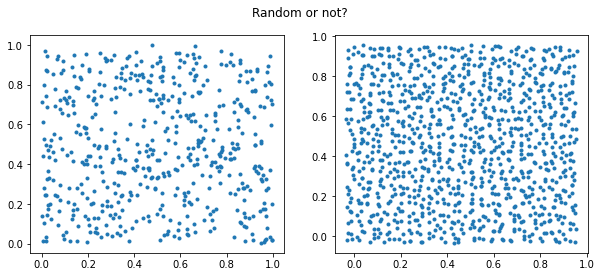

In [81]:
# random or not
import numpy as np
from matplotlib import pyplot as plt

def rand_array(n):
    return np.array(np.random.rand(n, 2))

def nonrand_array(n):
    ns = int(np.sqrt(n)) + 1
    res = []
    for nx in range(ns):
        for ny in range(ns):
            res.append((nx/ns+(np.random.rand(2)-1)/28, ny/ns+(np.random.rand(2)-1)/28))
    return np.array(res)
    
rarr = rand_array(529)
print(len(rarr))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle('Random or not?')
ax1.scatter(rarr[:,0], rarr[:,1], marker='.')

rarr = nonrand_array(500)
print(len(rarr))

ax2.scatter(rarr[:,0], rarr[:,1], marker='.')

plt.show()